In [1]:
# Loading packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# loading datasets

df_2016 = pd.read_csv('C:/Users/giese/Desktop/outros_projetos/Projetos-python/US_hospital_customer_satisfaction/cms_hospital_patient_satisfaction_2016.csv', sep = ',')

df_2017 = pd.read_csv('C:/Users/giese/Desktop/outros_projetos/Projetos-python/US_hospital_customer_satisfaction/cms_hospital_patient_satisfaction_2017.csv', sep = ',')

df_2018 = pd.read_csv('C:/Users/giese/Desktop/outros_projetos/Projetos-python/US_hospital_customer_satisfaction/cms_hospital_patient_satisfaction_2018.csv', sep = ',')

df_2019 = pd.read_csv('C:/Users/giese/Desktop/outros_projetos/Projetos-python/US_hospital_customer_satisfaction/cms_hospital_patient_satisfaction_2019.csv', sep = ',')

df_2020 = pd.read_csv('C:/Users/giese/Desktop/outros_projetos/Projetos-python/US_hospital_customer_satisfaction/cms_hospital_patient_satisfaction_2020.csv', sep = ',')

C:\Users\giese\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (14,17,19,26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\giese\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,14,17,19,26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# All columns of 2016 dataframe
pd.set_option('display.max_columns', None)
df_2016.head()

,Facility_ID,Facility_Name,Address,City,State,ZIP_Code,County_Name,Phone_Number,HCAHPS_Measure_ID,HCAHPS_Question,HCAHPS_Answer_Description,Patient_Survey_Star_Rating,Patient_Survey_Star_Rating_Footnote,HCAHPS_Answer_Percent,HCAHPS_Answer_Percent_Footnote,HCAHPS_Linear_Mean_Value,Number_of_Completed_Surveys,Number_of_Completed_Surveys_Footnote,Survey_Response_Rate_Percent,Survey_Response_Rate_Percent_Footnote,Start_Date,End_Date,Year,Hospital_Type,Hospital_Ownership,Emergency_Services,Meets_criteria_for_promoting_interoperability_of_EHRs,Hospital_overall_rating,Hospital_overall_rating_footnote,Mortality_national_comparison,Mortality_national_comparison_footnote,Safety_of_care_national_comparison,Safety_of_care_national_comparison_footnote,Readmission_national_comparison,Readmission_national_comparison_footnote,Patient_experience_national_comparison,Patient_experience_national_comparison_footnote,Effectiveness_of_care_national_comparison,Effectiveness_of_care_national_comparison_footnote,Timeliness_of_care_national_comparison,Timeliness_of_care_national_comparison_footnote,Efficient_use_of_medical_imaging_national_comparison,Efficient_use_of_medical_imaging_national_comparison_footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_STAR_RATING,Summary star rating,Summary star rating,3,NaN,Not Applicable,NaN,Not Applicable,1213,NaN,27,NaN,04/01/2015,03/31/2016,2016,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_A_P,Patients who reported that their room and bath...,"Room was ""always"" clean",Not Applicable,NaN,65,NaN,Not Applicable,1213,NaN,27,NaN,04/01/2015,03/31/2016,2016,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_SN_P,Patients who reported that their room and bath...,"Room was ""sometimes"" or ""never"" clean",Not Applicable,NaN,12,NaN,Not Applicable,1213,NaN,27,NaN,04/01/2015,03/31/2016,2016,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_U_P,Patients who reported that their room and bath...,"Room was ""usually"" clean",Not Applicable,NaN,23,NaN,Not Applicable,1213,NaN,27,NaN,04/01/2015,03/31/2016,2016,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_LINEAR_SCORE,Cleanliness - linear mean score,Cleanliness - linear mean score,Not Applicable,NaN,Not Applicable,NaN,84,1213,NaN,27,NaN,04/01/2015,03/31/2016,2016,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN,Below the National average,NaN,Same as the National a

In [4]:
# all 2016 dataframe info
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264385 entries, 0 to 264384
Data columns (total 43 columns):
 #   Column                                                         Non-Null Count   Dtype 
---  ------                                                         --------------   ----- 
 0   Facility_ID                                                    264385 non-null  int64 
 1   Facility_Name                                                  264385 non-null  object
 2   Address                                                        264385 non-null  object
 3   City                                                           264385 non-null  object
 4   State                                                          264385 non-null  object
 5   ZIP_Code                                                       264385 non-null  int64 
 6   County_Name                                                    263560 non-null  object
 7   Phone_Number                                            

In [5]:
# checking for NA values
df_2016.isnull().sum()

Facility_ID                                                           0
Facility_Name                                                         0
Address                                                               0
City                                                                  0
State                                                                 0
ZIP_Code                                                              0
County_Name                                                         825
Phone_Number                                                          0
HCAHPS_Measure_ID                                                     0
HCAHPS_Question                                                       0
HCAHPS_Answer_Description                                             0
Patient_Survey_Star_Rating                                            0
Patient_Survey_Star_Rating_Footnote                              248677
HCAHPS_Answer_Percent                                           

In [6]:
# Removing all non usable columns

df_2016 = df_2016.drop(["Facility_ID", "Address", "ZIP_Code", "County_Name", "Phone_Number",
                    "HCAHPS_Measure_ID", "HCAHPS_Question", "HCAHPS_Answer_Description", 
                    "Patient_Survey_Star_Rating_Footnote", "HCAHPS_Answer_Percent_Footnote",
                    "HCAHPS_Linear_Mean_Value", "Number_of_Completed_Surveys", 
                    "Patient_Survey_Star_Rating_Footnote", "Survey_Response_Rate_Percent", 
                    "Survey_Response_Rate_Percent_Footnote", "Year",  
                     "Meets_criteria_for_promoting_interoperability_of_EHRs", 
                    "Hospital_overall_rating_footnote", "Mortality_national_comparison_footnote", 
                    "Safety_of_care_national_comparison_footnote", 
                    "Readmission_national_comparison_footnote", 
                    "Patient_experience_national_comparison_footnote", 
                    "Effectiveness_of_care_national_comparison_footnote", 
                    "Timeliness_of_care_national_comparison_footnote", 
                    "Efficient_use_of_medical_imaging_national_comparison_footnote", 
                       "Number_of_Completed_Surveys_Footnote", "Start_Date", "End_Date", 
                       "HCAHPS_Answer_Percent"], axis = 1)

df_2017 = df_2017.drop(["Facility_ID", "Address", "ZIP_Code", "County_Name", "Phone_Number",
                    "HCAHPS_Measure_ID", "HCAHPS_Question", "HCAHPS_Answer_Description", 
                    "Patient_Survey_Star_Rating_Footnote", "HCAHPS_Answer_Percent_Footnote",
                    "HCAHPS_Linear_Mean_Value", "Number_of_Completed_Surveys", 
                    "Patient_Survey_Star_Rating_Footnote", "Survey_Response_Rate_Percent", 
                    "Survey_Response_Rate_Percent_Footnote", "Year",  
                     "Meets_criteria_for_promoting_interoperability_of_EHRs", 
                    "Hospital_overall_rating_footnote", "Mortality_national_comparison_footnote", 
                    "Safety_of_care_national_comparison_footnote", 
                    "Readmission_national_comparison_footnote", 
                    "Patient_experience_national_comparison_footnote", 
                    "Effectiveness_of_care_national_comparison_footnote", 
                    "Timeliness_of_care_national_comparison_footnote", 
                    "Efficient_use_of_medical_imaging_national_comparison_footnote", 
                       "Number_of_Completed_Surveys_Footnote", "Start_Date", "End_Date", 
                       "HCAHPS_Answer_Percent"], axis = 1)

df_2018 = df_2018.drop(["Facility_ID", "Address", "ZIP_Code", "County_Name", "Phone_Number",
                    "HCAHPS_Measure_ID", "HCAHPS_Question", "HCAHPS_Answer_Description", 
                    "Patient_Survey_Star_Rating_Footnote", "HCAHPS_Answer_Percent_Footnote",
                    "HCAHPS_Linear_Mean_Value", "Number_of_Completed_Surveys", 
                    "Patient_Survey_Star_Rating_Footnote", "Survey_Response_Rate_Percent", 
                    "Survey_Response_Rate_Percent_Footnote", "Year",  
                     "Meets_criteria_for_promoting_interoperability_of_EHRs", 
                    "Hospital_overall_rating_footnote", "Mortality_national_comparison_footnote", 
                    "Safety_of_care_national_comparison_footnote", 
                    "Readmission_national_comparison_footnote", 
                    "Patient_experience_national_comparison_footnote", 
                    "Effectiveness_of_care_national_comparison_footnote", 
                    "Timeliness_of_care_national_comparison_footnote", 
                    "Efficient_use_of_medical_imaging_national_comparison_footnote", 
                       "Number_of_Completed_Surveys_Footnote", "Start_Date", "End_Date", 
                       "HCAHPS_Answer_Percent"], axis = 1)

df_2019 = df_2019.drop(["Facility_ID", "Address", "ZIP_Code", "County_Name", "Phone_Number",
                    "HCAHPS_Measure_ID", "HCAHPS_Question", "HCAHPS_Answer_Description", 
                    "Patient_Survey_Star_Rating_Footnote", "HCAHPS_Answer_Percent_Footnote",
                    "HCAHPS_Linear_Mean_Value", "Number_of_Completed_Surveys", 
                    "Patient_Survey_Star_Rating_Footnote", "Survey_Response_Rate_Percent", 
                    "Survey_Response_Rate_Percent_Footnote", "Year",  
                     "Meets_criteria_for_promoting_interoperability_of_EHRs", 
                    "Hospital_overall_rating_footnote", "Mortality_national_comparison_footnote", 
                    "Safety_of_care_national_comparison_footnote", 
                    "Readmission_national_comparison_footnote", 
                    "Patient_experience_national_comparison_footnote", 
                    "Effectiveness_of_care_national_comparison_footnote", 
                    "Timeliness_of_care_national_comparison_footnote", 
                    "Efficient_use_of_medical_imaging_national_comparison_footnote", 
                       "Number_of_Completed_Surveys_Footnote", "Start_Date", "End_Date", 
                       "HCAHPS_Answer_Percent"], axis = 1)

df_2020 = df_2020.drop(["Facility_ID", "Address", "ZIP_Code", "County_Name", "Phone_Number",
                    "HCAHPS_Measure_ID", "HCAHPS_Question", "HCAHPS_Answer_Description", 
                    "Patient_Survey_Star_Rating_Footnote", "HCAHPS_Answer_Percent_Footnote",
                    "HCAHPS_Linear_Mean_Value", "Number_of_Completed_Surveys", 
                    "Patient_Survey_Star_Rating_Footnote", "Survey_Response_Rate_Percent", 
                    "Survey_Response_Rate_Percent_Footnote", "Year",  
                     "Meets_criteria_for_promoting_interoperability_of_EHRs", 
                    "Hospital_overall_rating_footnote", "Mortality_national_comparison_footnote", 
                    "Safety_of_care_national_comparison_footnote", 
                    "Readmission_national_comparison_footnote", 
                    "Patient_experience_national_comparison_footnote", 
                    "Effectiveness_of_care_national_comparison_footnote", 
                    "Timeliness_of_care_national_comparison_footnote", 
                    "Efficient_use_of_medical_imaging_national_comparison_footnote", 
                       "Number_of_Completed_Surveys_Footnote", "Start_Date", "End_Date", 
                       "HCAHPS_Answer_Percent"], axis = 1)


In [7]:
# dataset with columns removed
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264385 entries, 0 to 264384
Data columns (total 15 columns):
 #   Column                                                Non-Null Count   Dtype 
---  ------                                                --------------   ----- 
 0   Facility_Name                                         264385 non-null  object
 1   City                                                  264385 non-null  object
 2   State                                                 264385 non-null  object
 3   Patient_Survey_Star_Rating                            264385 non-null  object
 4   Hospital_Type                                         264385 non-null  object
 5   Hospital_Ownership                                    264385 non-null  object
 6   Emergency_Services                                    264385 non-null  object
 7   Hospital_overall_rating                               264385 non-null  object
 8   Mortality_national_comparison                         

In [8]:
# No columns with NA values now
df_2016.isnull().sum()

Facility_Name                                           0
City                                                    0
State                                                   0
Patient_Survey_Star_Rating                              0
Hospital_Type                                           0
Hospital_Ownership                                      0
Emergency_Services                                      0
Hospital_overall_rating                                 0
Mortality_national_comparison                           0
Safety_of_care_national_comparison                      0
Readmission_national_comparison                         0
Patient_experience_national_comparison                  0
Effectiveness_of_care_national_comparison               0
Timeliness_of_care_national_comparison                  0
Efficient_use_of_medical_imaging_national_comparison    0
dtype: int64

In [9]:
# all variables in Patient_Survey_Star_Rating column
df_2016["Patient_Survey_Star_Rating"].value_counts()

Not Applicable    206701
Not Available      15708
4                  14165
3                  14041
2                   8467
5                   3407
1                   1896
Name: Patient_Survey_Star_Rating, dtype: int64

C:\Users\giese\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


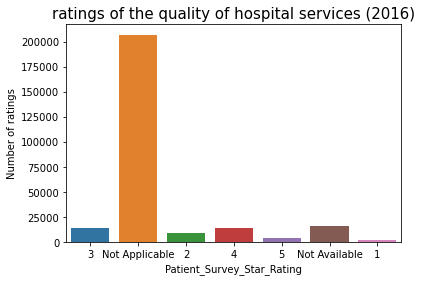

In [10]:
# barplot with 2016 survey ratings
fig, ax = plt.subplots()
plt.title('ratings of the quality of hospital services (2016)', fontsize = 15)
sns.countplot(df_2016.Patient_Survey_Star_Rating)
ax.set_ylabel('Number of ratings')
plt.show()

<AxesSubplot:xlabel='Patient_Survey_Star_Rating', ylabel='count'>

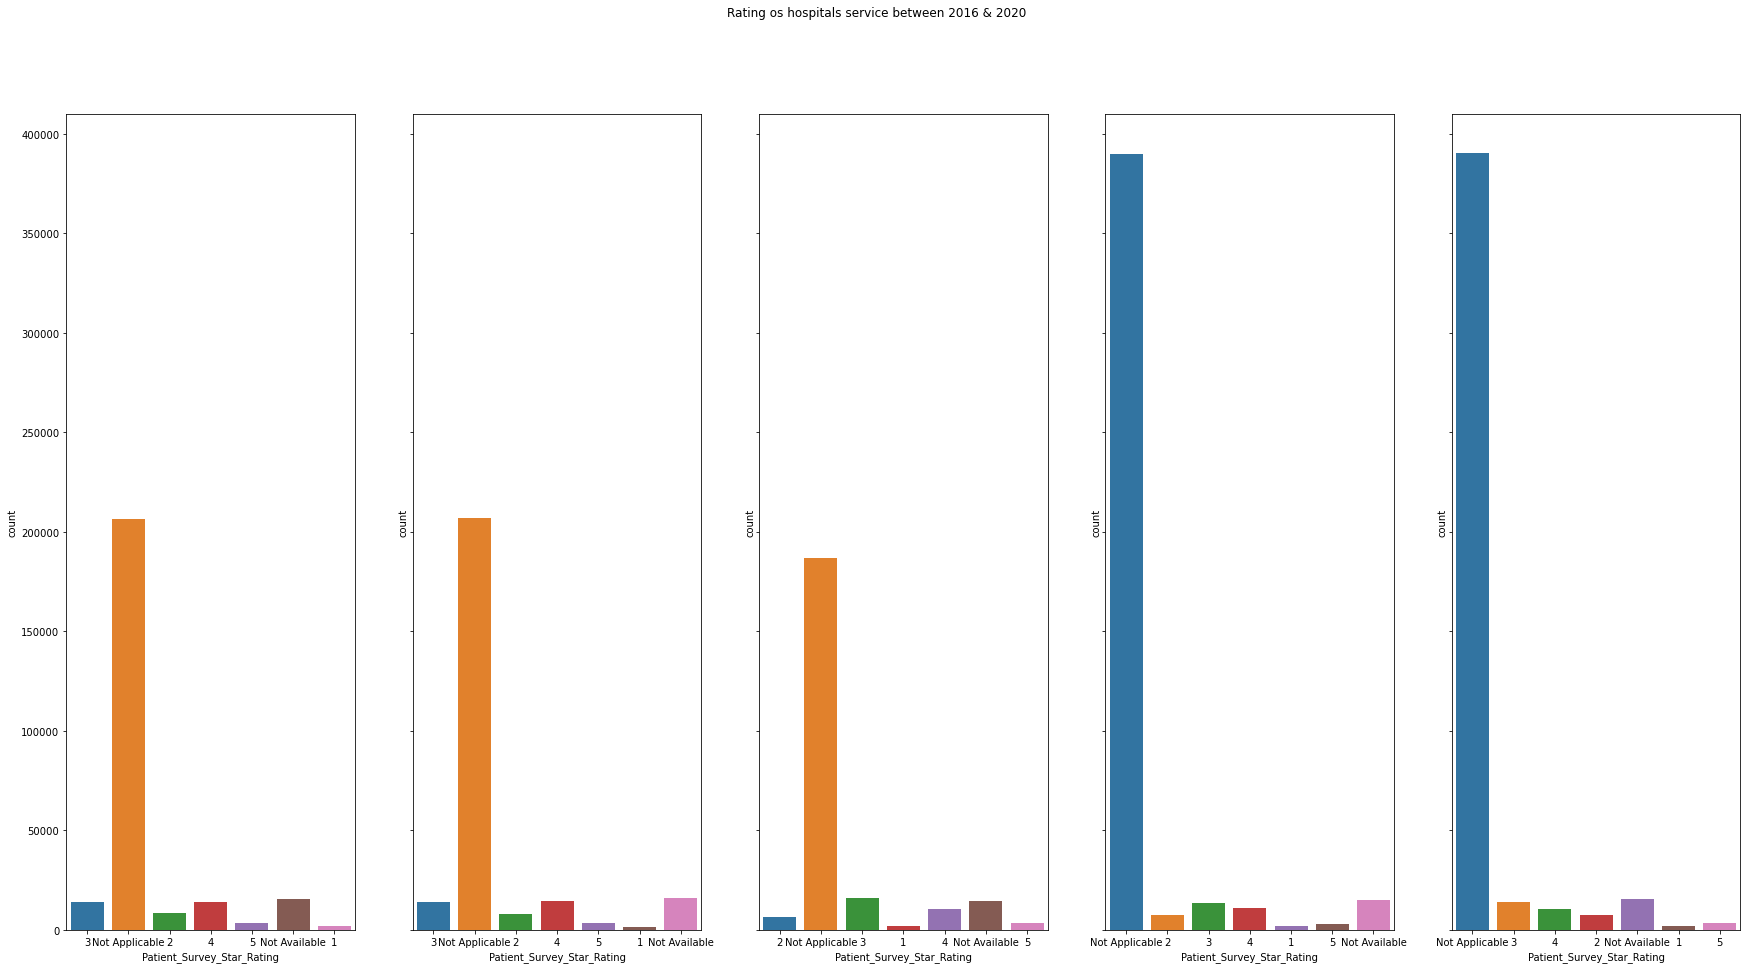

In [11]:
# barplot of all years survey rating 

fig, axes = plt.subplots(1, 5, figsize = (30, 15), sharey = True)
fig.suptitle('Rating os hospitals service between 2016 & 2020')

# 2016 data
sns.countplot(ax = axes[0], x = df_2016.Patient_Survey_Star_Rating)

# 2017 data
sns.countplot(ax = axes[1], x = df_2017.Patient_Survey_Star_Rating)

# 2018 data
sns.countplot(ax = axes[2], x = df_2018.Patient_Survey_Star_Rating)

# 2019 data
sns.countplot(ax = axes[3], x = df_2019.Patient_Survey_Star_Rating)

# 2020 data
sns.countplot(ax = axes[4], x = df_2020.Patient_Survey_Star_Rating)

In [12]:
# removing Not applicable and not aviable from Patient_Survey_Star_Rating column

df_20162 = df_2016.copy(deep = True)

df_20172 = df_2017.copy(deep = True)

df_20182 = df_2018.copy(deep = True)

df_20192 = df_2019.copy(deep = True)

df_20202 = df_2020.copy(deep = True)

In [13]:
pd.set_option('display.max_columns', None)
df_20162.head()

,Facility_Name,City,State,Patient_Survey_Star_Rating,Hospital_Type,Hospital_Ownership,Emergency_Services,Hospital_overall_rating,Mortality_national_comparison,Safety_of_care_national_comparison,Readmission_national_comparison,Patient_experience_national_comparison,Effectiveness_of_care_national_comparison,Timeliness_of_care_national_comparison,Efficient_use_of_medical_imaging_national_comparison
0,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,3,Acute Care Hospitals,Government - Hospital District or Authority,Yes,3,Same as the National average,Above the National average,Same as the National average,Below the National average,Same as the National average,Same as the National average,Same as the National average
1,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,Not Applicable,Acute Care Hospitals,Government - Hospital District or Authority,Yes,3,Same as the National average,Above the National average,Same as the National average,Below the National average,Same as the National average,Same as the National average,Same as the National average
2,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,Not Applicable,Acute Care Hospitals,Government - Hospital District or Authority,Yes,3,Same as the National average,Above the National average,Same as the National average,Below the National average,Same as the National average,Same as the National average,Same as the National average
3,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,Not Applicable,Acute Care Hospitals,Government - Hospital District or Authority,Yes,3,Same as the National average,Above the National average,Same as the National average,Below the National average,Same as the National average,Same as the National average,Same as the National average
4,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,Not Applicable,Acute Care Hospitals,Government - Hospital District or Authority,Yes,3,Same as the National average,Above the National average,Same as the National average,Below the National average,Same as the National average,Same as the National average,Same as the National average


In [14]:
df_20162 = df_20162.drop(df_20162[df_20162["Patient_Survey_Star_Rating"] == "Not Available"].index)
df_20162 = df_20162.drop(df_20162[df_20162["Patient_Survey_Star_Rating"] == "Not Applicable"].index)

df_20172 = df_20172.drop(df_20172[df_20172["Patient_Survey_Star_Rating"] == "Not Available"].index)
df_20172 = df_20172.drop(df_20172[df_20172["Patient_Survey_Star_Rating"] == "Not Applicable"].index)

df_20182 = df_20182.drop(df_20182[df_20182["Patient_Survey_Star_Rating"] == "Not Available"].index)
df_20182 = df_20182.drop(df_20182[df_20182["Patient_Survey_Star_Rating"] == "Not Applicable"].index)

df_20192 = df_20192.drop(df_20192[df_20192["Patient_Survey_Star_Rating"] == "Not Available"].index)
df_20192 = df_20192.drop(df_20192[df_20192["Patient_Survey_Star_Rating"] == "Not Applicable"].index)

df_20202 = df_20202.drop(df_20202[df_20202["Patient_Survey_Star_Rating"] == "Not Available"].index)
df_20202 = df_20202.drop(df_20202[df_20202["Patient_Survey_Star_Rating"] == "Not Applicable"].index)

In [15]:
df_20162["Patient_Survey_Star_Rating"].value_counts()

4    14165
3    14041
2     8467
5     3407
1     1896
Name: Patient_Survey_Star_Rating, dtype: int64

In [16]:
sns.set(font_scale = 2)
plt.style.use("ggplot")

Text(0.5, 1.0, '2020 ratings')

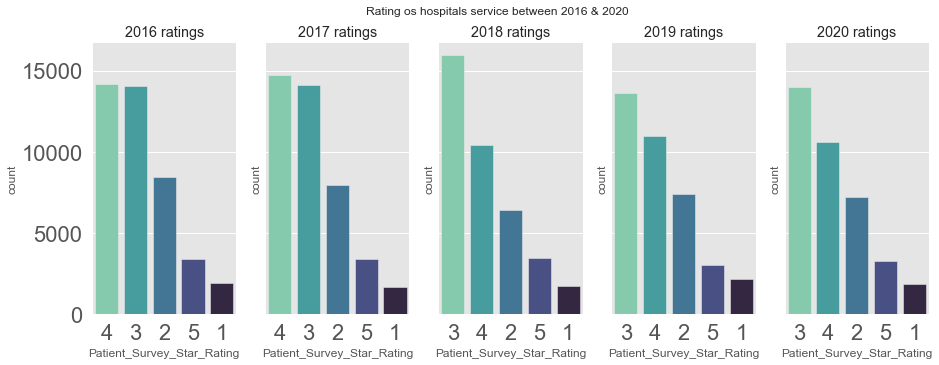

In [17]:
fig, axes = plt.subplots(1, 5, figsize = (15, 5), sharey = True)
fig.suptitle('Rating os hospitals service between 2016 & 2020')

# 2016 data
df_ord = df_20162["Patient_Survey_Star_Rating"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[0], x = df_20162.Patient_Survey_Star_Rating, palette = "mako_r", order = df_ord)
axes[0].set_title("2016 ratings")

# 2017 data
df_ord2 = df_20172["Patient_Survey_Star_Rating"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[1], x = df_20172.Patient_Survey_Star_Rating, palette = "mako_r", order = df_ord2)
axes[1].set_title("2017 ratings")

# 2018 data
df_ord3 = df_20182["Patient_Survey_Star_Rating"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[2], x = df_20182.Patient_Survey_Star_Rating, palette = "mako_r", order = df_ord3)
axes[2].set_title("2018 ratings")

# 2019 data
df_ord4 = df_20192["Patient_Survey_Star_Rating"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[3], x = df_20192.Patient_Survey_Star_Rating, palette = "mako_r", order = df_ord4)
axes[3].set_title("2019 ratings")

# 2020 data
df_ord5 = df_20202["Patient_Survey_Star_Rating"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[4], x = df_20202.Patient_Survey_Star_Rating, palette = "mako_r", order = df_ord5)
axes[4].set_title("2020 ratings")

In [18]:
df_2016["Hospital_Type"].value_counts()

Acute Care Hospitals         185350
Critical Access Hospitals     73590
Childrens                      5445
Name: Hospital_Type, dtype: int64

In [19]:
sns.set(font_scale = 1)
plt.style.use("ggplot")

Text(0.5, 1.0, '2020 hospital types quantity')

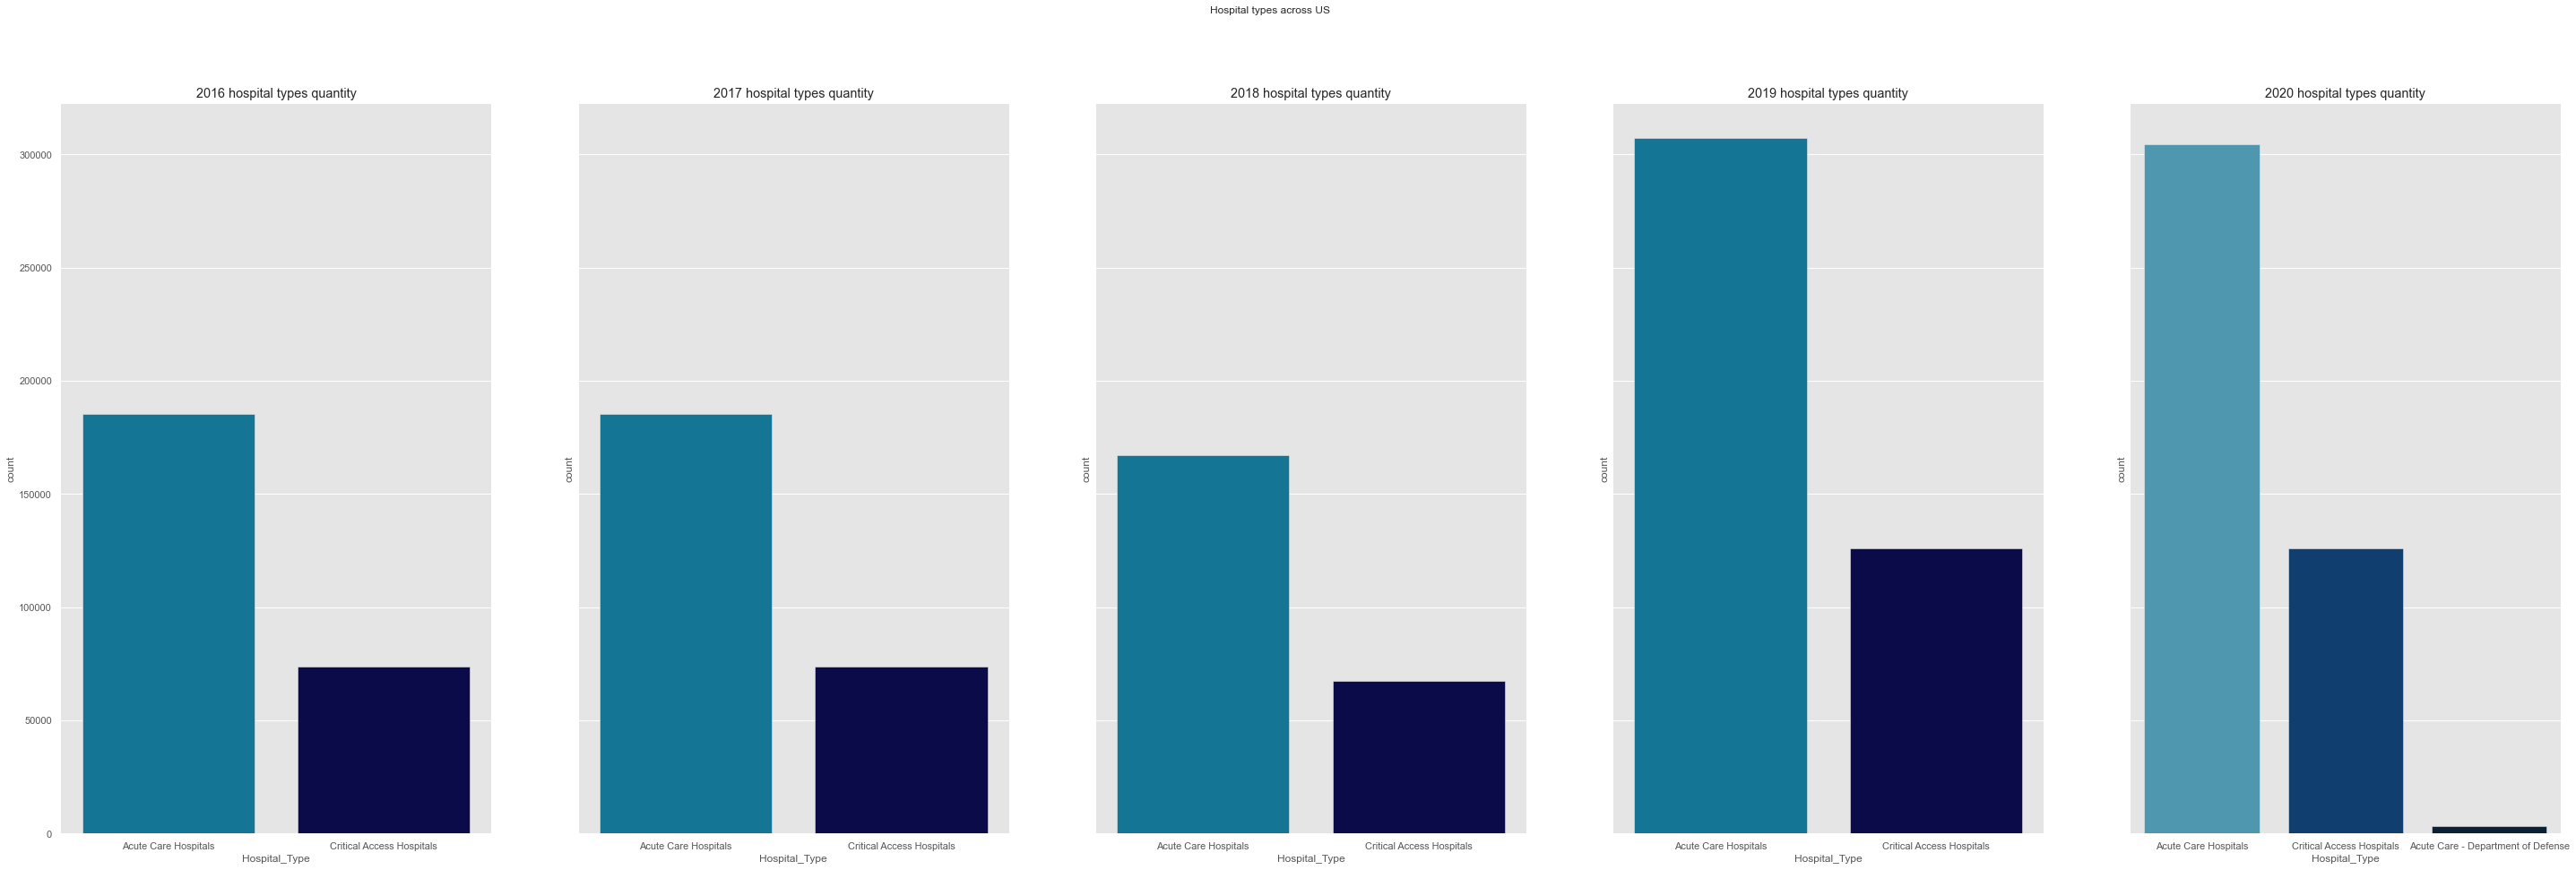

In [20]:
fig, axes = plt.subplots(1, 5, figsize = (50, 15), sharey = True)
fig.suptitle('Hospital types across US')

# 2016 data
df_ord = df_20162["Hospital_Type"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[0], x = df_2016.Hospital_Type, palette = "ocean_r", order = df_ord)
axes[0].set_title("2016 hospital types quantity")

# 2017 data
df_ord2 = df_20172["Hospital_Type"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[1], x = df_2017.Hospital_Type, palette = "ocean_r", order = df_ord2)
axes[1].set_title("2017 hospital types quantity")

# 2018 data
df_ord3 = df_20182["Hospital_Type"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[2], x = df_2018.Hospital_Type, palette = "ocean_r", order = df_ord3)
axes[2].set_title("2018 hospital types quantity")

# 2019 data
df_ord4 = df_20192["Hospital_Type"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[3], x = df_2019.Hospital_Type, palette = "ocean_r", order = df_ord4)
axes[3].set_title("2019 hospital types quantity")

# 2020 data
df_ord5 = df_20202["Hospital_Type"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[4], x = df_2020.Hospital_Type, palette = "ocean_r", order = df_ord5)
axes[4].set_title("2020 hospital types quantity")

In [21]:
df_2016["Hospital_Ownership"].value_counts()

Voluntary non-profit - Private                 112035
Proprietary                                     43780
Government - Hospital District or Authority     31130
Voluntary non-profit - Other                    26015
Government - Local                              22330
Voluntary non-profit - Church                   18920
Government - State                               3685
Physician                                        3520
Government - Federal                             2530
Tribal                                            440
Name: Hospital_Ownership, dtype: int64

In [22]:
sns.set(font_scale = 2)
plt.style.use("ggplot")

Text(0.5, 1.0, 'Hospital_Ownership (2020)')

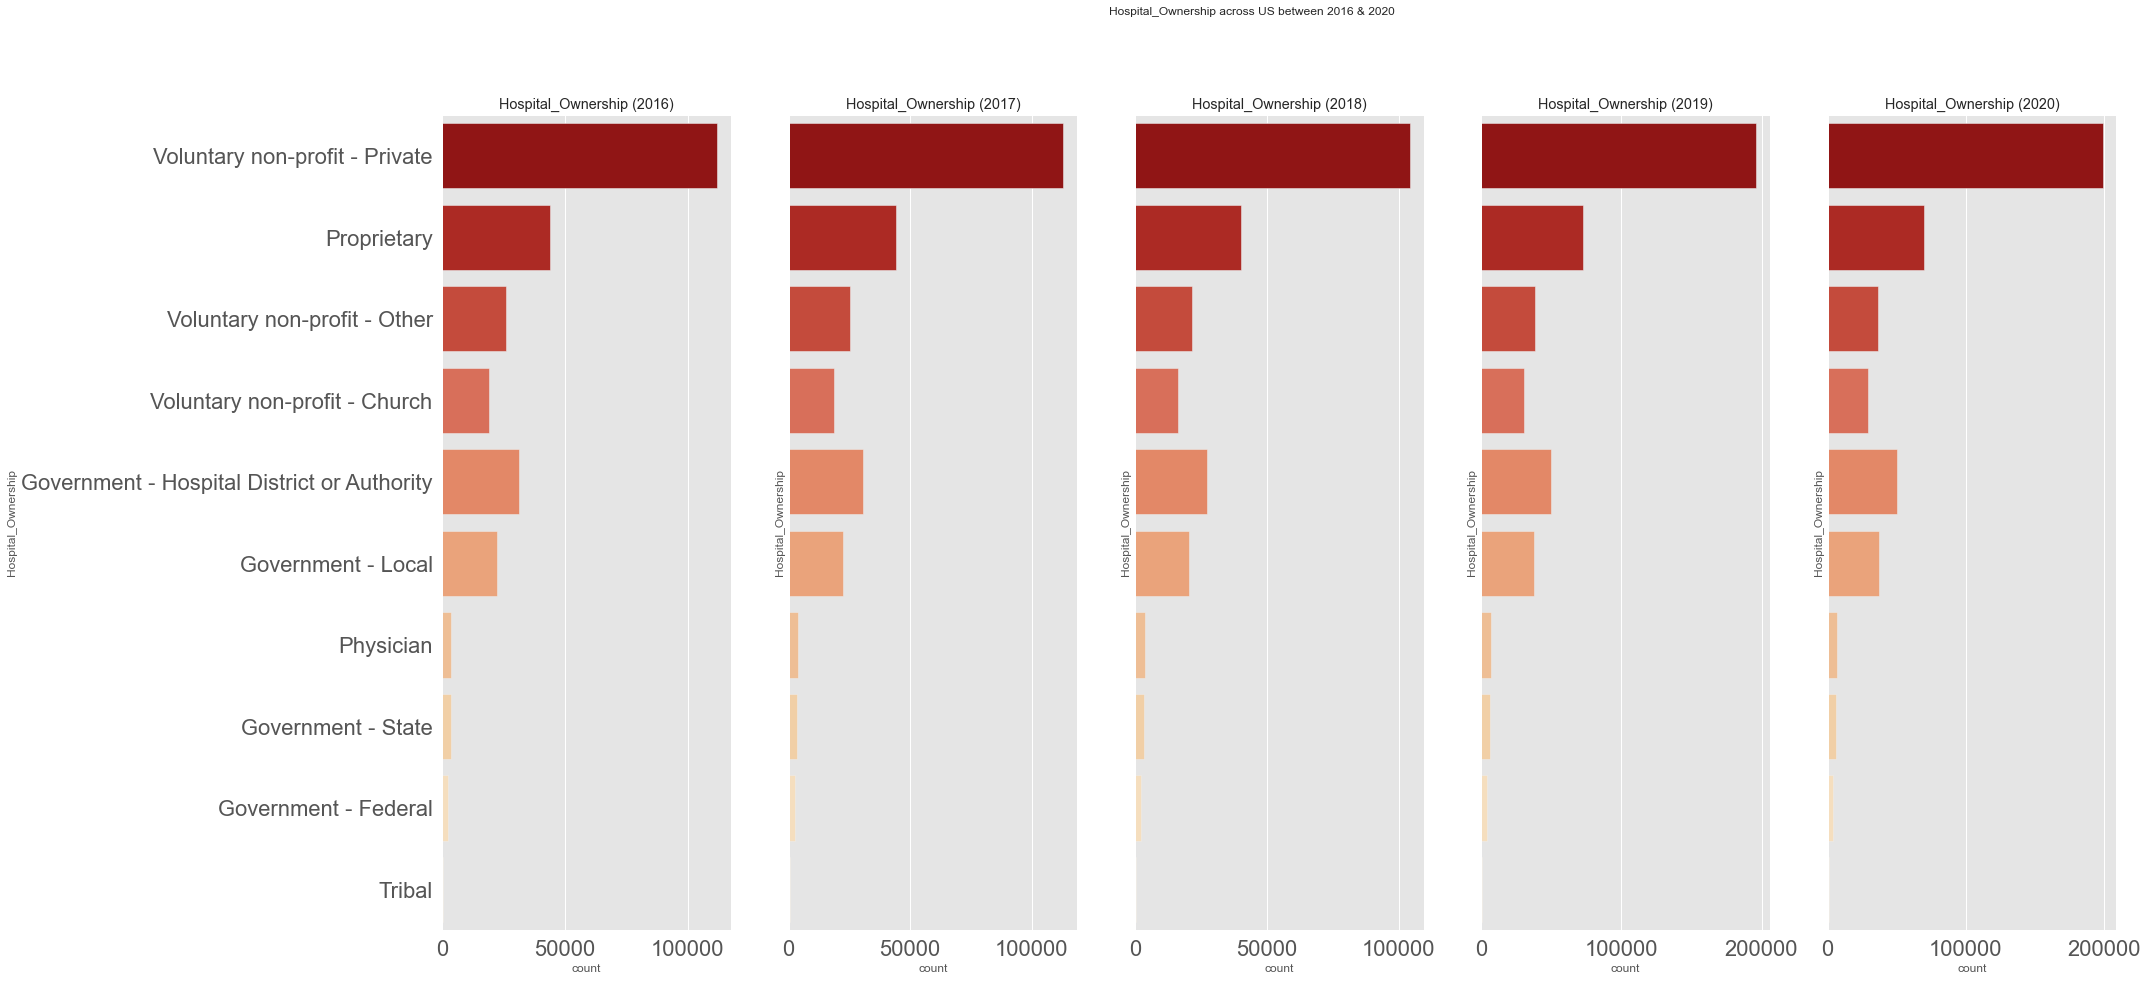

In [23]:
fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharey=True)
fig.suptitle('Hospital_Ownership across US between 2016 & 2020')

# 2016 data
df_ord = df_20162["Hospital_Ownership"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[0], y = df_2016.Hospital_Ownership, palette = 'OrRd_r', order = df_ord)
axes[0].set_title("Hospital_Ownership (2016)")

# 2017 data
df_ord2 = df_20162["Hospital_Ownership"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[1], y = df_2017.Hospital_Ownership, palette = 'OrRd_r', order = df_ord2)
axes[1].set_title("Hospital_Ownership (2017)")

# 2018 data
df_ord3 = df_20162["Hospital_Ownership"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[2], y = df_2018.Hospital_Ownership, palette = 'OrRd_r', order = df_ord3)
axes[2].set_title("Hospital_Ownership (2018)")

# 2019 data
df_ord4 = df_20162["Hospital_Ownership"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[3], y = df_2019.Hospital_Ownership, palette = 'OrRd_r', order = df_ord4)
axes[3].set_title("Hospital_Ownership (2019)")

# 2020 data
df_ord5 = df_20162["Hospital_Ownership"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[4], y = df_2020.Hospital_Ownership, palette = 'OrRd_r', order = df_ord5)
axes[4].set_title("Hospital_Ownership (2020)")

In [24]:
df_2016["Emergency_Services"].value_counts()

Yes    248160
No      16225
Name: Emergency_Services, dtype: int64

In [25]:
sns.set(font_scale = 2)
plt.style.use("ggplot")

Text(0.5, 1.0, 'Emergency services 2020')

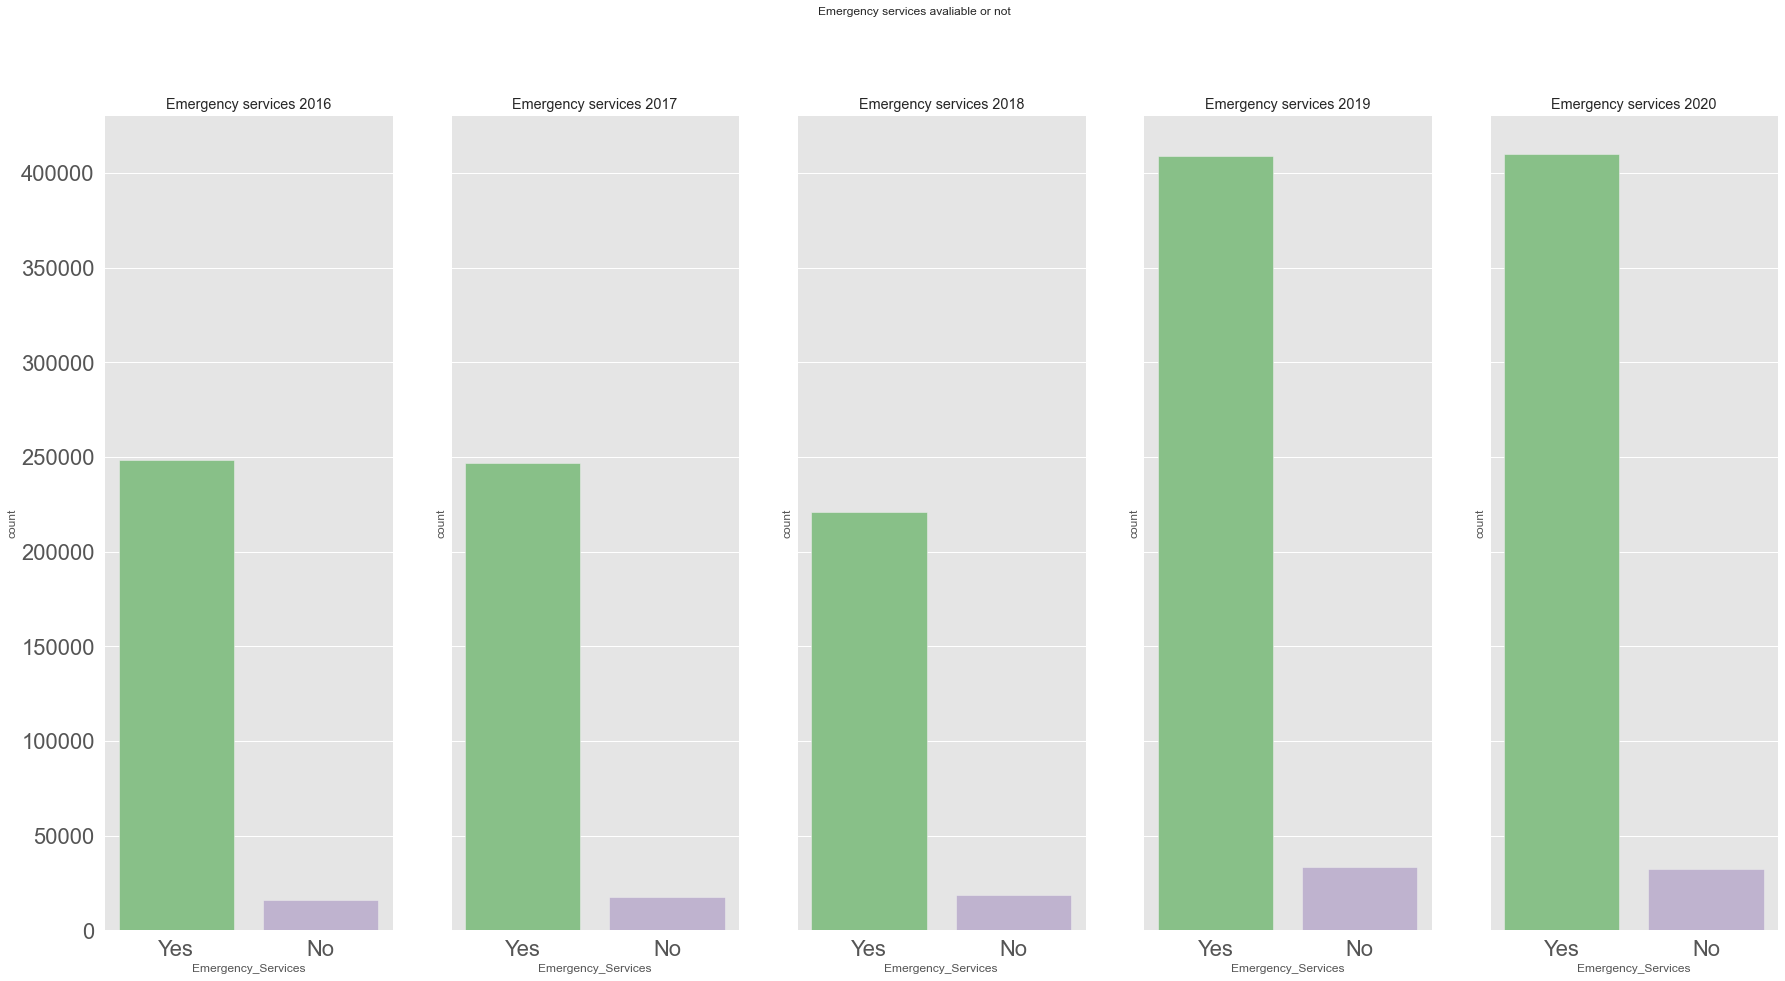

In [26]:
fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharey=True)
fig.suptitle('Emergency services avaliable or not')

# 2016 data
sns.countplot(ax = axes[0], x = df_2016.Emergency_Services, palette = "Accent")
axes[0].set_title("Emergency services 2016")

# 2017 data
sns.countplot(ax = axes[1], x = df_2017.Emergency_Services, palette = "Accent")
axes[1].set_title("Emergency services 2017")

# 2018 data
sns.countplot(ax = axes[2], x = df_2018.Emergency_Services, palette = "Accent")
axes[2].set_title("Emergency services 2018")

# 2019 data
sns.countplot(ax = axes[3], x = df_2019.Emergency_Services, palette = "Accent")
axes[3].set_title("Emergency services 2019")

# 2020 data
sns.countplot(ax = axes[4], x = df_2020.Emergency_Services, palette = "Accent")
axes[4].set_title("Emergency services 2020")

In [27]:
df_2016["Hospital_overall_rating"].value_counts()

3                97570
Not Available    67265
4                51755
2                37345
1                 5940
5                 4510
Name: Hospital_overall_rating, dtype: int64

In [28]:
sns.set(font_scale = 2)
plt.style.use("ggplot")

Text(0.5, 1.0, 'Overall rating 2020')

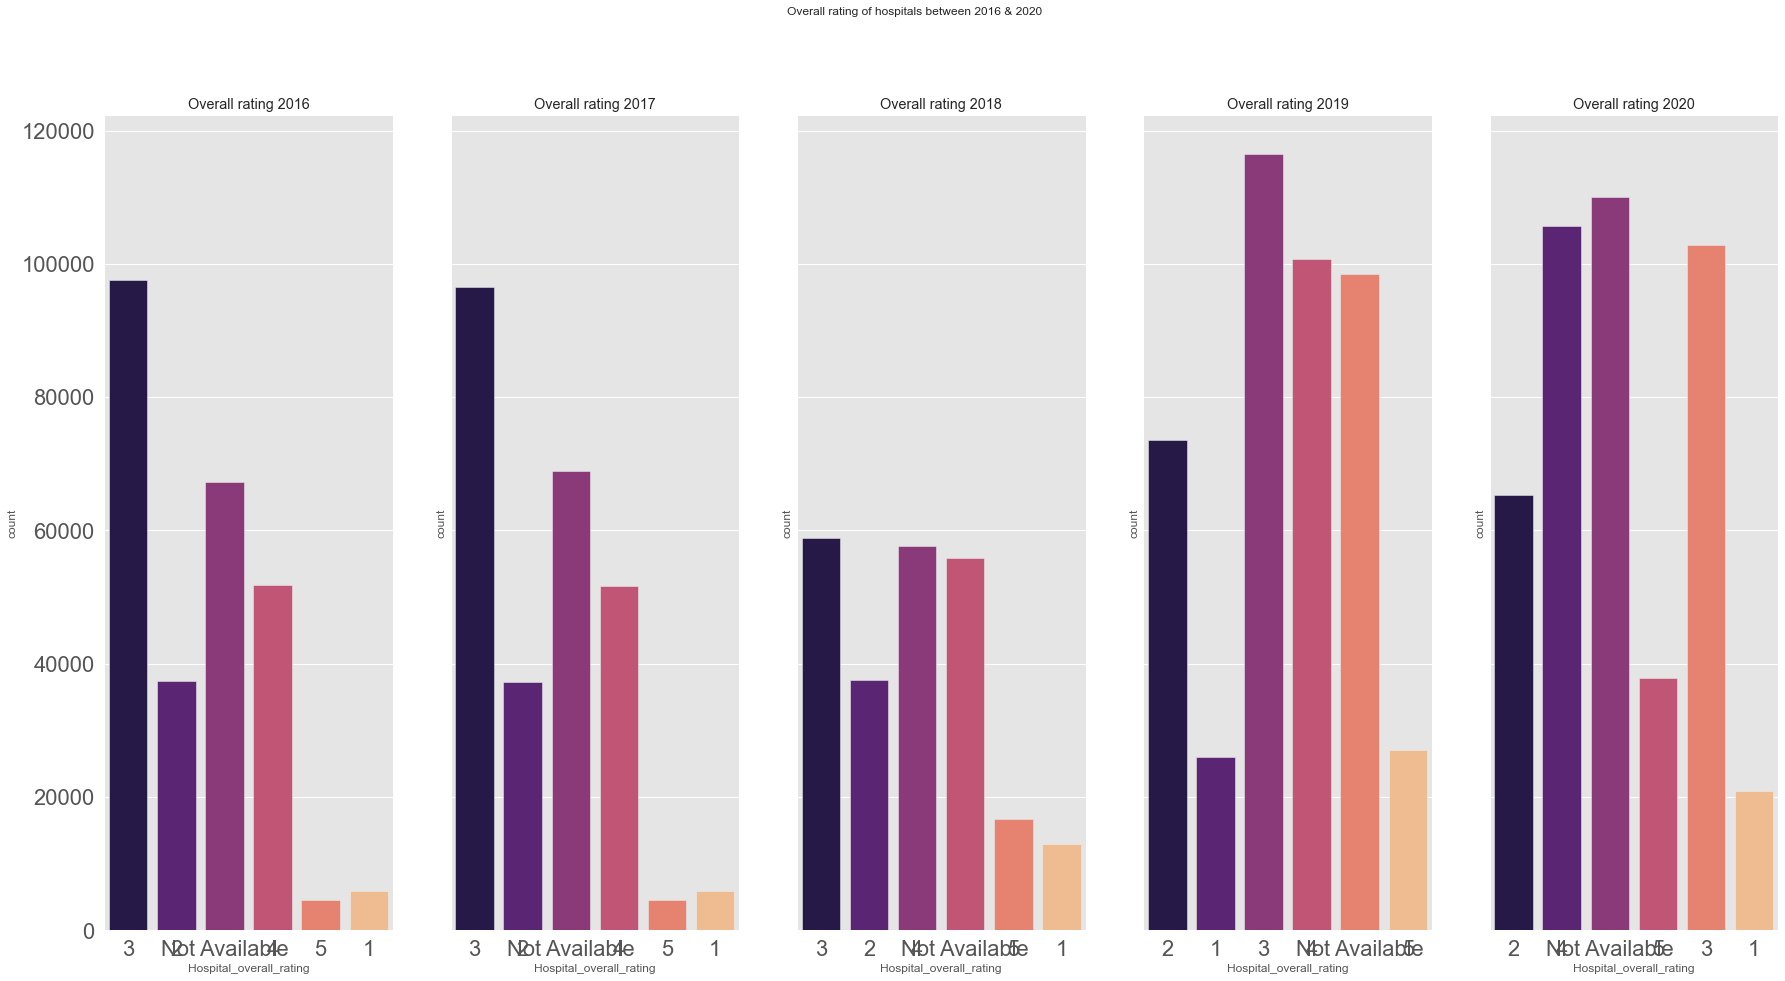

In [29]:
fig, axes = plt.subplots(1, 5, figsize = (30, 15), sharey = True)
fig.suptitle('Overall rating of hospitals between 2016 & 2020')


# 2016 data
sns.countplot(ax = axes[0], x = df_2016.Hospital_overall_rating, palette = 'magma')
axes[0].set_title("Overall rating 2016")

# 2017 data
sns.countplot(ax = axes[1], x = df_2017.Hospital_overall_rating, palette = 'magma')
axes[1].set_title("Overall rating 2017")

# 2018 data
sns.countplot(ax = axes[2], x = df_2018.Hospital_overall_rating, palette = 'magma')
axes[2].set_title("Overall rating 2018")

# 2019 data
sns.countplot(ax = axes[3], x = df_2019.Hospital_overall_rating, palette = 'magma')
axes[3].set_title("Overall rating 2019")

# 2020 data
sns.countplot(ax = axes[4], x = df_2020.Hospital_overall_rating, palette = 'magma')
axes[4].set_title("Overall rating 2020")

In [30]:
df_2016["Mortality_national_comparison"].value_counts()

Same as the National average    150480
Not Available                    73150
Above the National average       22000
Below the National average       18755
Name: Mortality_national_comparison, dtype: int64

In [31]:
sns.set(font_scale = 2)
plt.style.use("ggplot")

Text(0.5, 1.0, 'Mortality national comparison 2020')

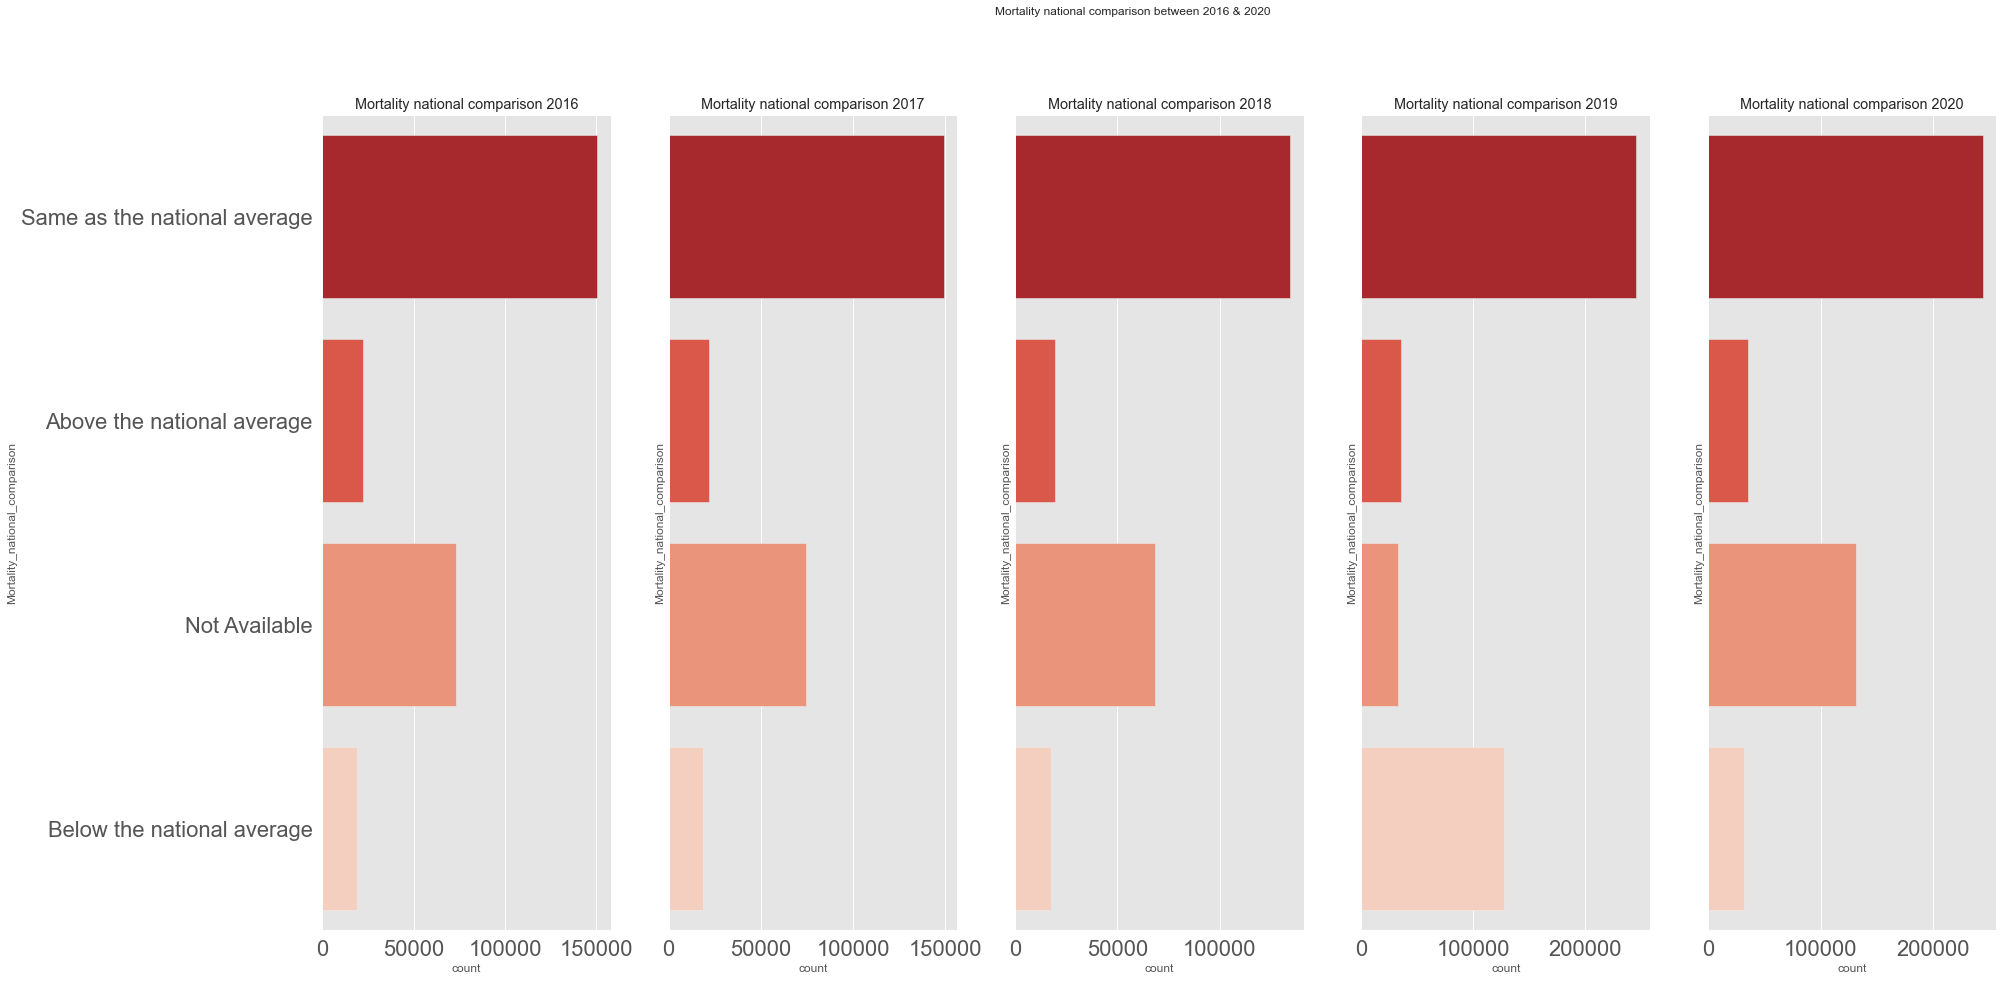

In [32]:
fig, axes = plt.subplots(1, 5, figsize = (30, 15), sharey = True)
fig.suptitle('Mortality national comparison between 2016 & 2020')

# 2016 data
df_ord = df_20162["Mortality_national_comparison"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[0], y = df_2016.Mortality_national_comparison, palette = "Reds_r", order = df_ord)
axes[0].set_title("Mortality national comparison 2016")

# 2017 data
df_ord2 = df_20172["Mortality_national_comparison"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[1], y = df_2017.Mortality_national_comparison, palette = "Reds_r", order = df_ord2)
axes[1].set_title("Mortality national comparison 2017")

# 2018 data
df_ord3 = df_20182["Mortality_national_comparison"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[2], y = df_2018.Mortality_national_comparison, palette = "Reds_r", order = df_ord3)
axes[2].set_title("Mortality national comparison 2018")

# 2019 data
df_ord4 = df_20192["Mortality_national_comparison"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[3], y = df_2019.Mortality_national_comparison, palette = "Reds_r", order = df_ord4)
axes[3].set_title("Mortality national comparison 2019")

# 2020 data
df_ord5 = df_20202["Mortality_national_comparison"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[4], y = df_2020.Mortality_national_comparison, palette = "Reds_r", order = df_ord5)
axes[4].set_title("Mortality national comparison 2020")

In [33]:
df_2016["Safety_of_care_national_comparison"].value_counts()

Not Available                   118415
Same as the National average     66110
Above the National average       43285
Below the National average       36575
Name: Safety_of_care_national_comparison, dtype: int64

In [34]:
sns.set(font_scale = 2)
plt.style.use("ggplot")

Text(0.5, 1.0, 'Safety of care national comparison 2020')

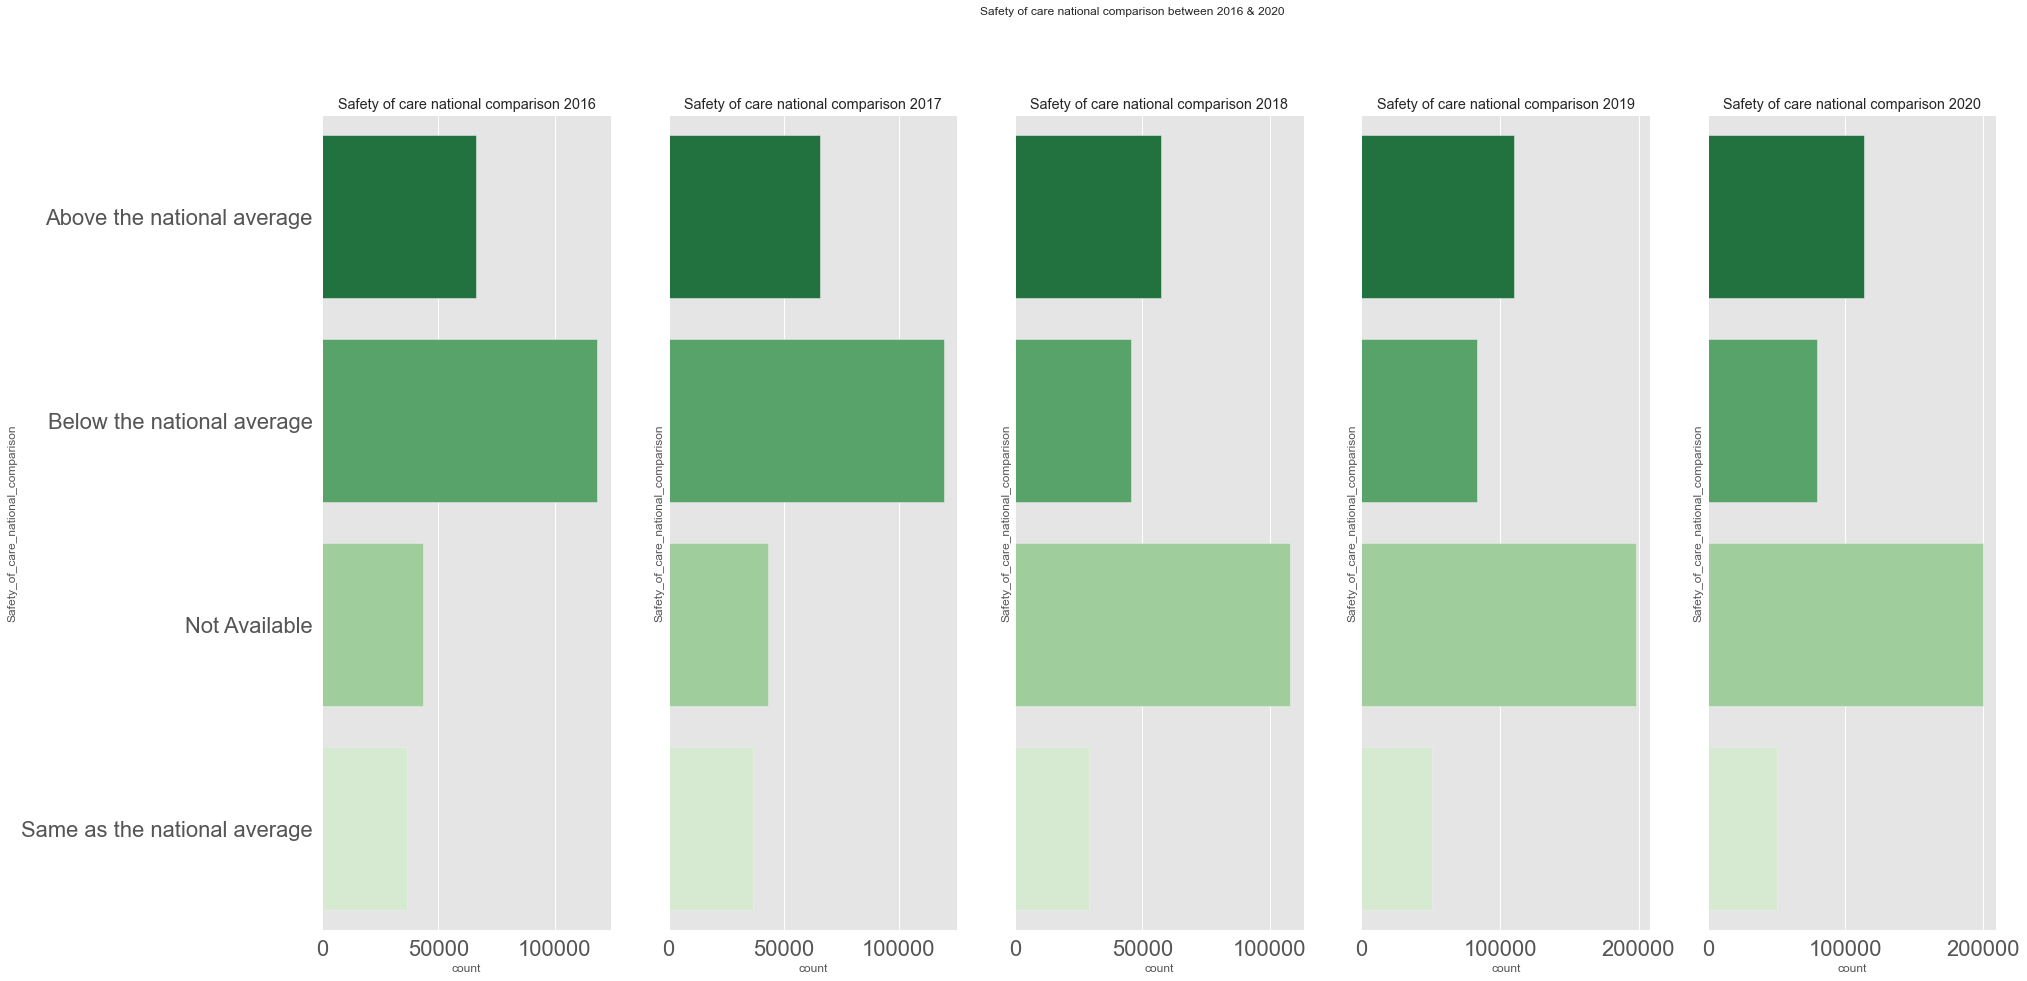

In [35]:
fig, axes = plt.subplots(1, 5, figsize = (30, 15), sharey = True)
fig.suptitle('Safety of care national comparison between 2016 & 2020')

# 2016 data
df_ord = df_20162["Safety_of_care_national_comparison"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[0], y = df_2016.Safety_of_care_national_comparison, palette = "Greens_r", order = df_ord)
axes[0].set_title("Safety of care national comparison 2016")

# 2017 data
df_ord2 = df_20172["Safety_of_care_national_comparison"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[1], y = df_2017.Safety_of_care_national_comparison, palette = "Greens_r", order = df_ord2)
axes[1].set_title("Safety of care national comparison 2017")

# 2018 data
df_ord3 = df_20182["Safety_of_care_national_comparison"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[2], y = df_2018.Safety_of_care_national_comparison, palette = "Greens_r", order = df_ord3)
axes[2].set_title("Safety of care national comparison 2018")

# 2019 data
df_ord4 = df_20192["Safety_of_care_national_comparison"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[3], y = df_2019.Safety_of_care_national_comparison, palette = "Greens_r", order = df_ord4)
axes[3].set_title("Safety of care national comparison 2019")

# 2020 data
df_ord5 = df_20202["Safety_of_care_national_comparison"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[4], y = df_2020.Safety_of_care_national_comparison, palette ="Greens_r", order = df_ord5)
axes[4].set_title("Safety of care national comparison 2020")

In [36]:
df_2016["Readmission_national_comparison"].value_counts()

Same as the National average    117315
Not Available                    54670
Below the National average       47795
Above the National average       44605
Name: Readmission_national_comparison, dtype: int64

In [37]:
sns.set(font_scale = 2)
plt.style.use("ggplot")

Text(0.5, 1.0, 'Readmission national comparison 2020')

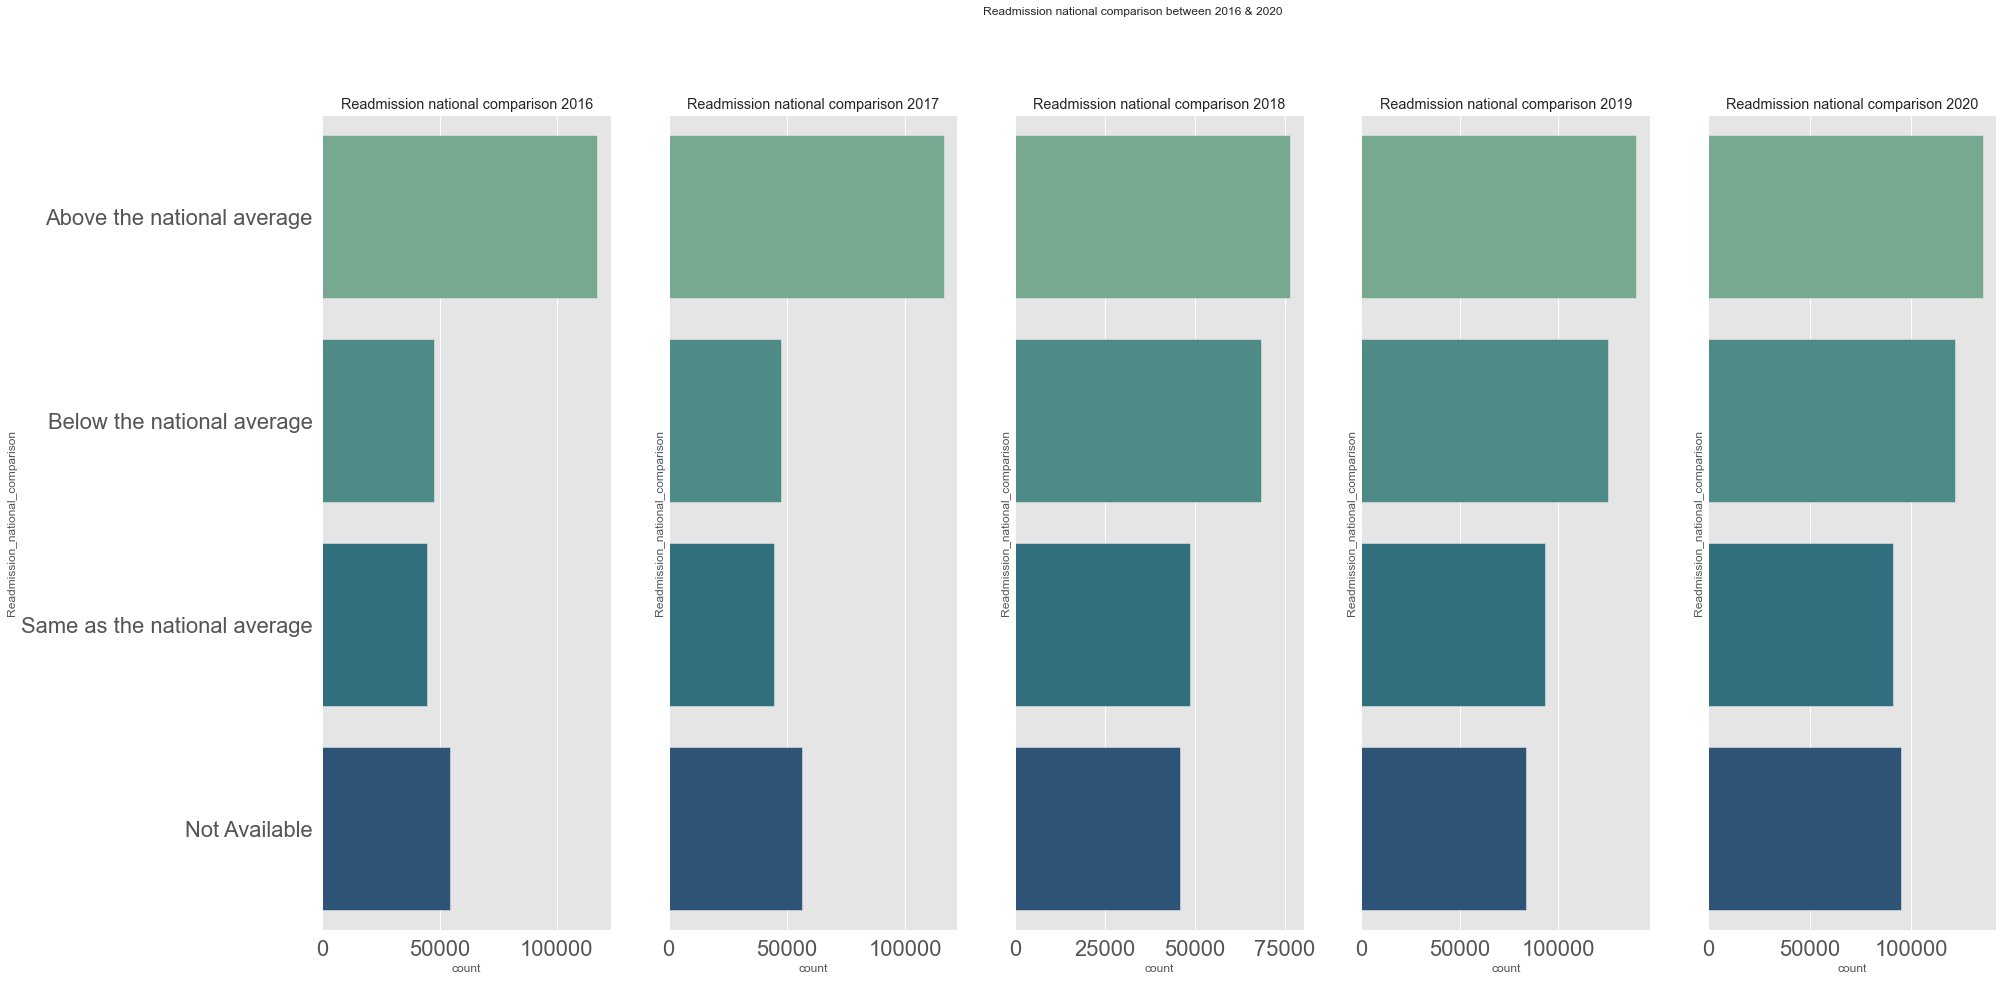

In [38]:
fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharey=True)
fig.suptitle('Readmission national comparison between 2016 & 2020')

# 2016 data
df_ord = df_20162["Readmission_national_comparison"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[0], y = df_2016.Readmission_national_comparison, palette = "crest", order = df_ord)
axes[0].set_title("Readmission national comparison 2016")

# 2017 data
df_ord2 = df_20172["Readmission_national_comparison"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[1], y = df_2017.Readmission_national_comparison, palette = "crest", order = df_ord2)
axes[1].set_title("Readmission national comparison 2017")

# 2018 data
df_ord3 = df_20182["Readmission_national_comparison"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[2], y = df_2018.Readmission_national_comparison, palette = "crest", order = df_ord3)
axes[2].set_title("Readmission national comparison 2018")

# 2019 data
df_ord4 = df_20192["Readmission_national_comparison"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[3], y = df_2019.Readmission_national_comparison, palette = "crest", order = df_ord4)
axes[3].set_title("Readmission national comparison 2019")

# 2020 data
df_ord5 = df_20202["Readmission_national_comparison"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[4], y = df_2020.Readmission_national_comparison, palette = "crest", order = df_ord5)
axes[4].set_title("Readmission national comparison 2020")

In [39]:
df_2016["Patient_experience_national_comparison"].value_counts()

Not Available                   74415
Above the National average      66935
Same as the National average    63415
Below the National average      59620
Name: Patient_experience_national_comparison, dtype: int64

In [40]:
sns.set(font_scale = 2)
plt.style.use("ggplot")

Text(0.5, 1.0, 'Patient experience national comparison 2020')

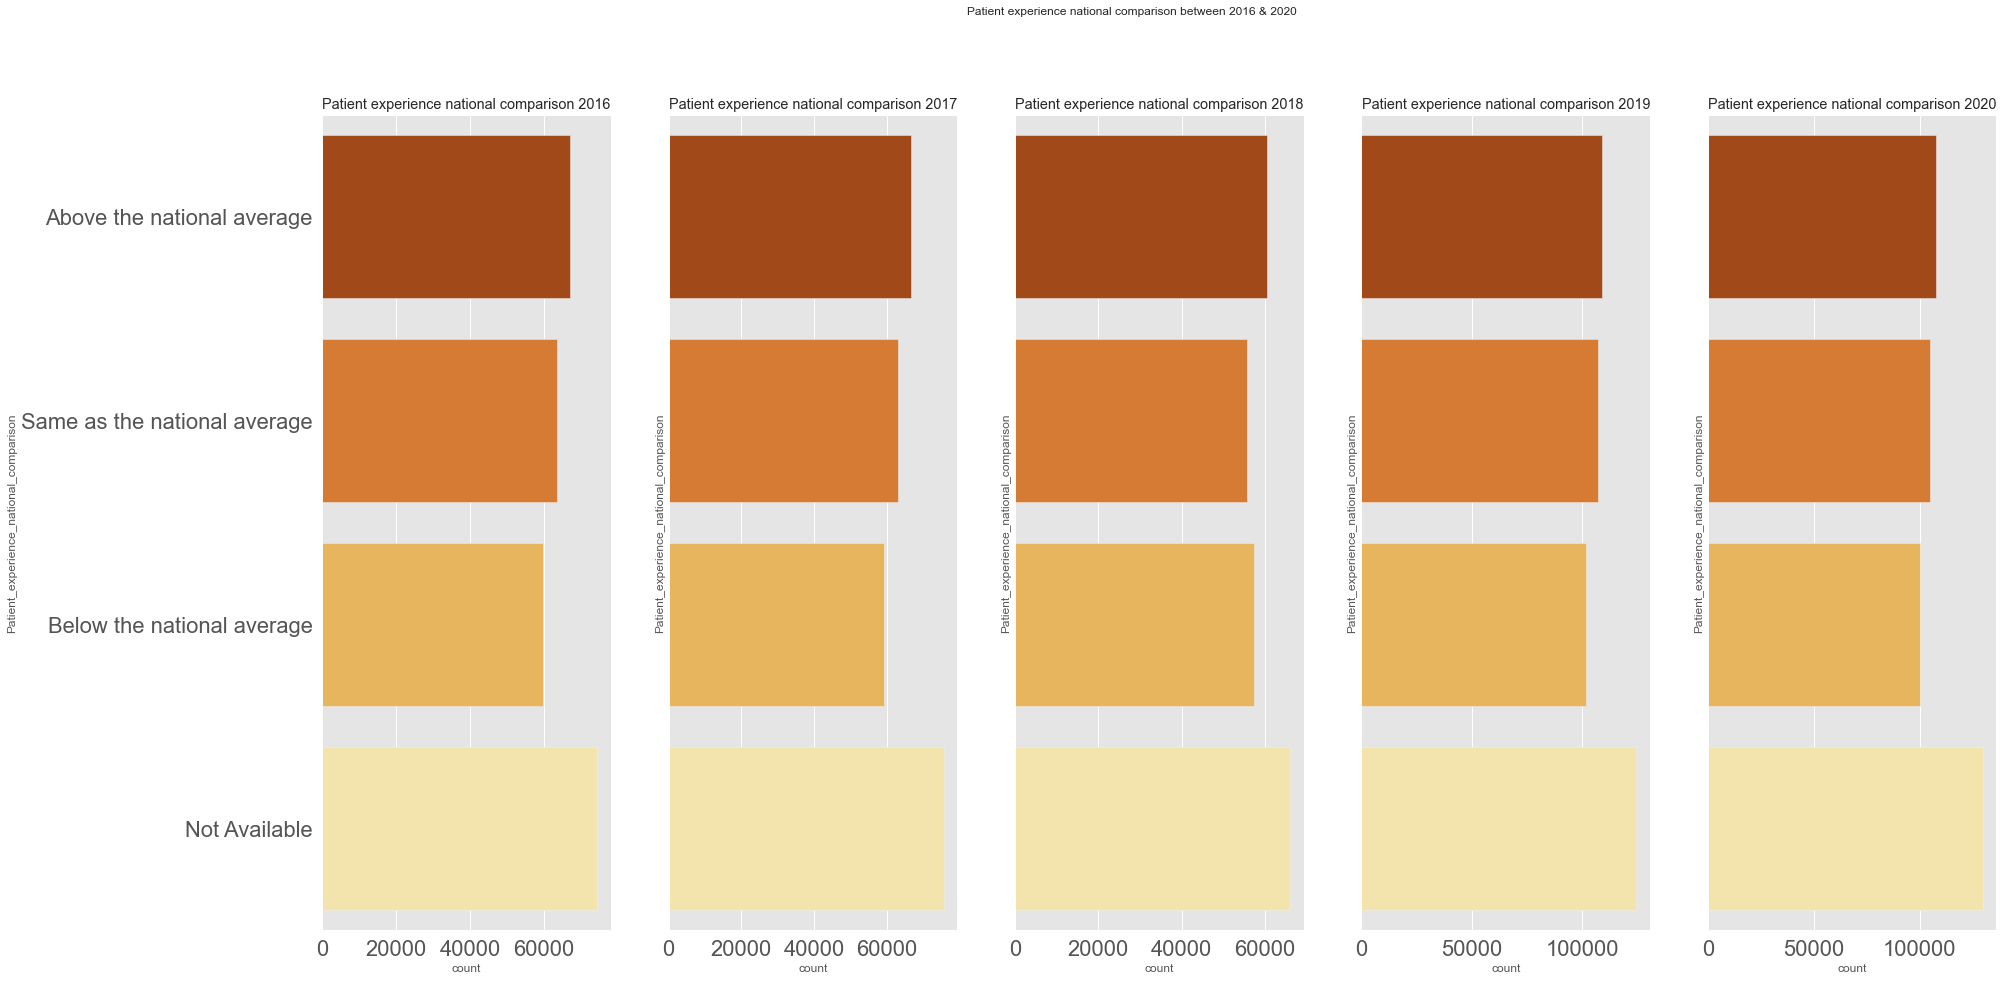

In [41]:
fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharey=True)
fig.suptitle('Patient experience national comparison between 2016 & 2020')

# 2016 data
df_ord = df_20162["Patient_experience_national_comparison"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[0], y = df_2016.Patient_experience_national_comparison, palette = "YlOrBr_r", order = df_ord)
axes[0].set_title("Patient experience national comparison 2016")

# 2017 data
df_ord2 = df_20172["Patient_experience_national_comparison"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[1], y = df_2017.Patient_experience_national_comparison, palette = "YlOrBr_r", order = df_ord2)
axes[1].set_title("Patient experience national comparison 2017")

# 2018 data
df_ord3 = df_20182["Patient_experience_national_comparison"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[2], y = df_2018.Patient_experience_national_comparison, palette = "YlOrBr_r", order = df_ord3)
axes[2].set_title("Patient experience national comparison 2018")

# 2019 data
df_ord4 = df_20192["Patient_experience_national_comparison"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[3], y = df_2019.Patient_experience_national_comparison, palette = "YlOrBr_r", order = df_ord4)
axes[3].set_title("Patient experience national comparison 2019")

# 2020 data
df_ord5 = df_20202["Patient_experience_national_comparison"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[4], y = df_2020.Patient_experience_national_comparison, palette = "YlOrBr_r", order = df_ord5)
axes[4].set_title("Patient experience national comparison 2020")

In [42]:
df_2016["Effectiveness_of_care_national_comparison"].value_counts()

Same as the National average    178860
Not Available                    64900
Below the National average       13475
Above the National average        7150
Name: Effectiveness_of_care_national_comparison, dtype: int64

In [43]:
sns.set(font_scale = 2)
plt.style.use("ggplot")

Text(0.5, 1.0, 'Effectiveness of care national comparison 2020')

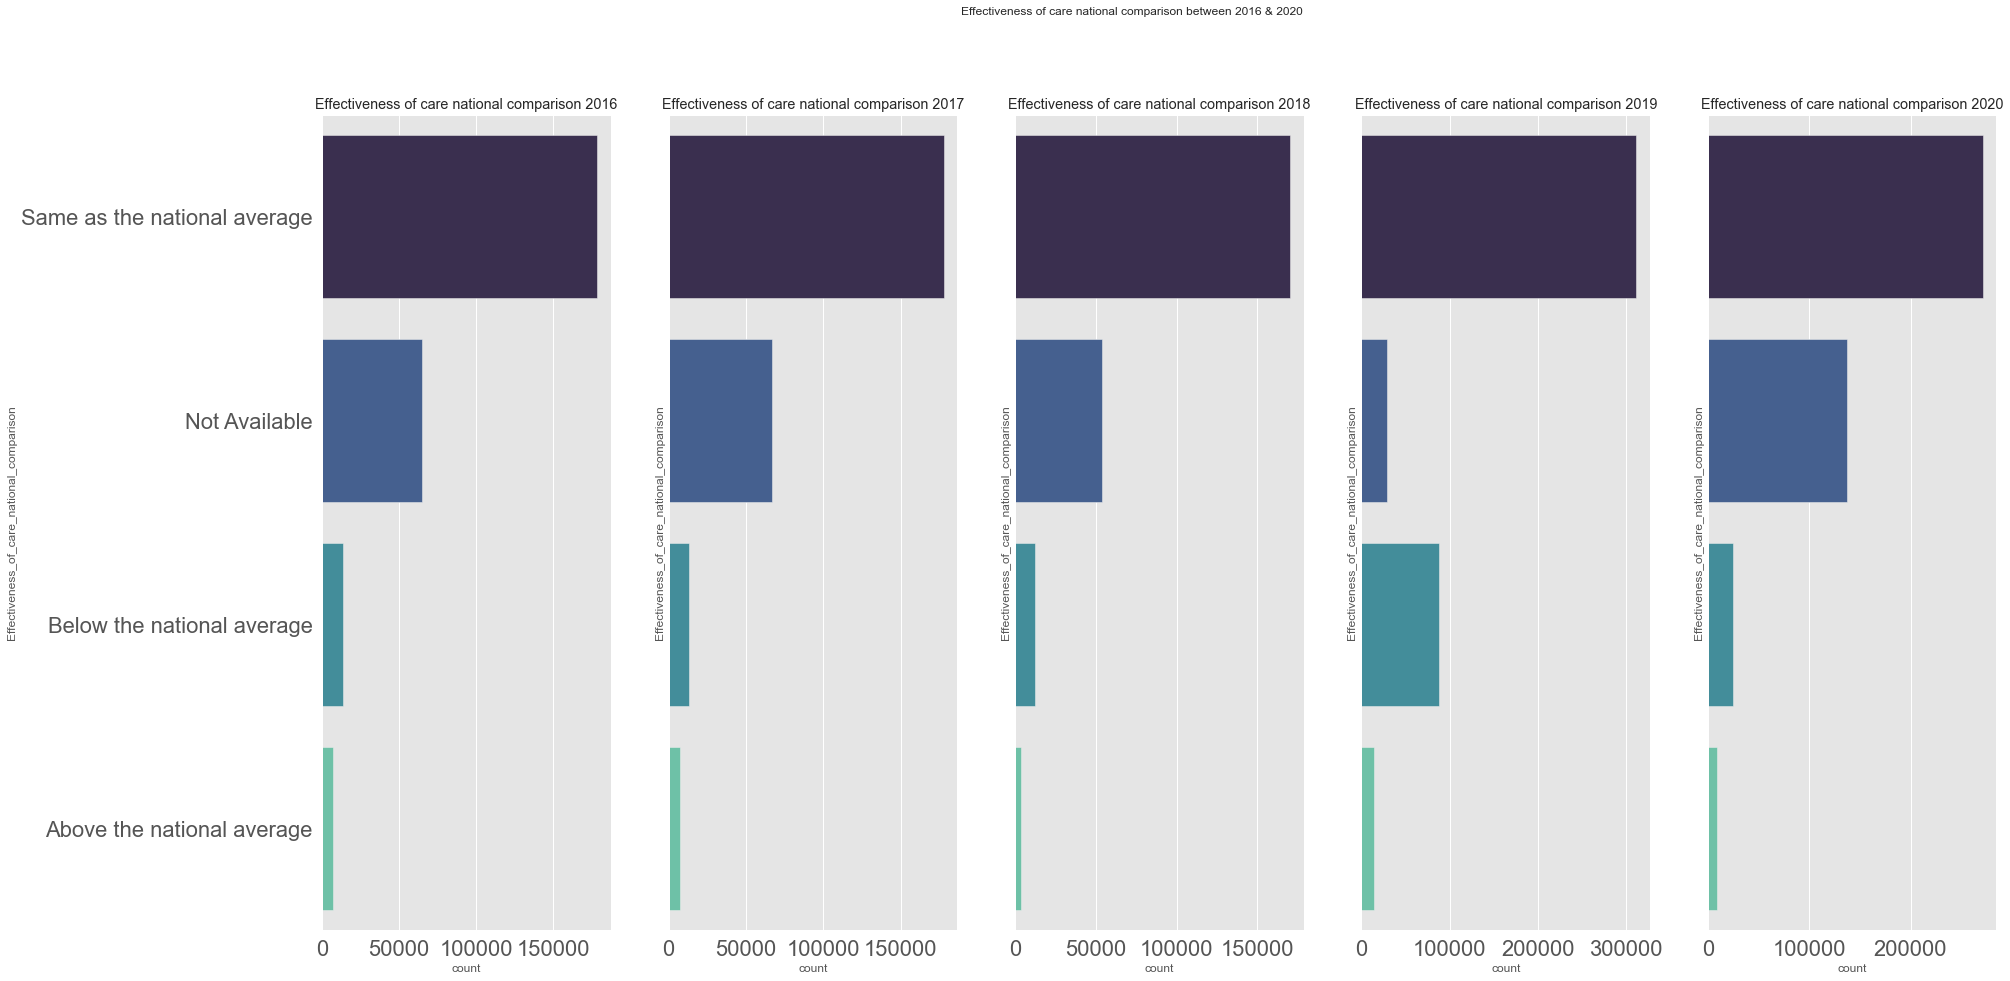

In [44]:
fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharey=True)
fig.suptitle('Effectiveness of care national comparison between 2016 & 2020')

# 2016 data
df_ord = df_20162["Effectiveness_of_care_national_comparison"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[0], y = df_2016.Effectiveness_of_care_national_comparison, palette = "mako", order = df_ord)
axes[0].set_title("Effectiveness of care national comparison 2016")

# 2017 data
df_ord2 = df_20172["Effectiveness_of_care_national_comparison"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[1], y = df_2017.Effectiveness_of_care_national_comparison, palette = "mako", order = df_ord2)
axes[1].set_title("Effectiveness of care national comparison 2017")

# 2018 data
df_ord3 = df_20182["Effectiveness_of_care_national_comparison"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[2], y = df_2018.Effectiveness_of_care_national_comparison, palette = "mako", order = df_ord3)
axes[2].set_title("Effectiveness of care national comparison 2018")

# 2019 data
df_ord4 = df_20192["Effectiveness_of_care_national_comparison"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[3], y = df_2019.Effectiveness_of_care_national_comparison, palette = "mako", order = df_ord4)
axes[3].set_title("Effectiveness of care national comparison 2019")

# 2020 data
df_ord5 = df_20202["Effectiveness_of_care_national_comparison"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[4], y = df_2020.Effectiveness_of_care_national_comparison, palette = "mako", order = df_ord5)
axes[4].set_title("Effectiveness of care national comparison 2020")

In [45]:
df_2016["Timeliness_of_care_national_comparison"].value_counts()

Same as the National average    86020
Not Available                   68310
Above the National average      60280
Below the National average      49775
Name: Timeliness_of_care_national_comparison, dtype: int64

In [46]:
sns.set(font_scale = 2)
plt.style.use("ggplot")

Text(0.5, 1.0, 'Timeliness of care national comparison 2020')

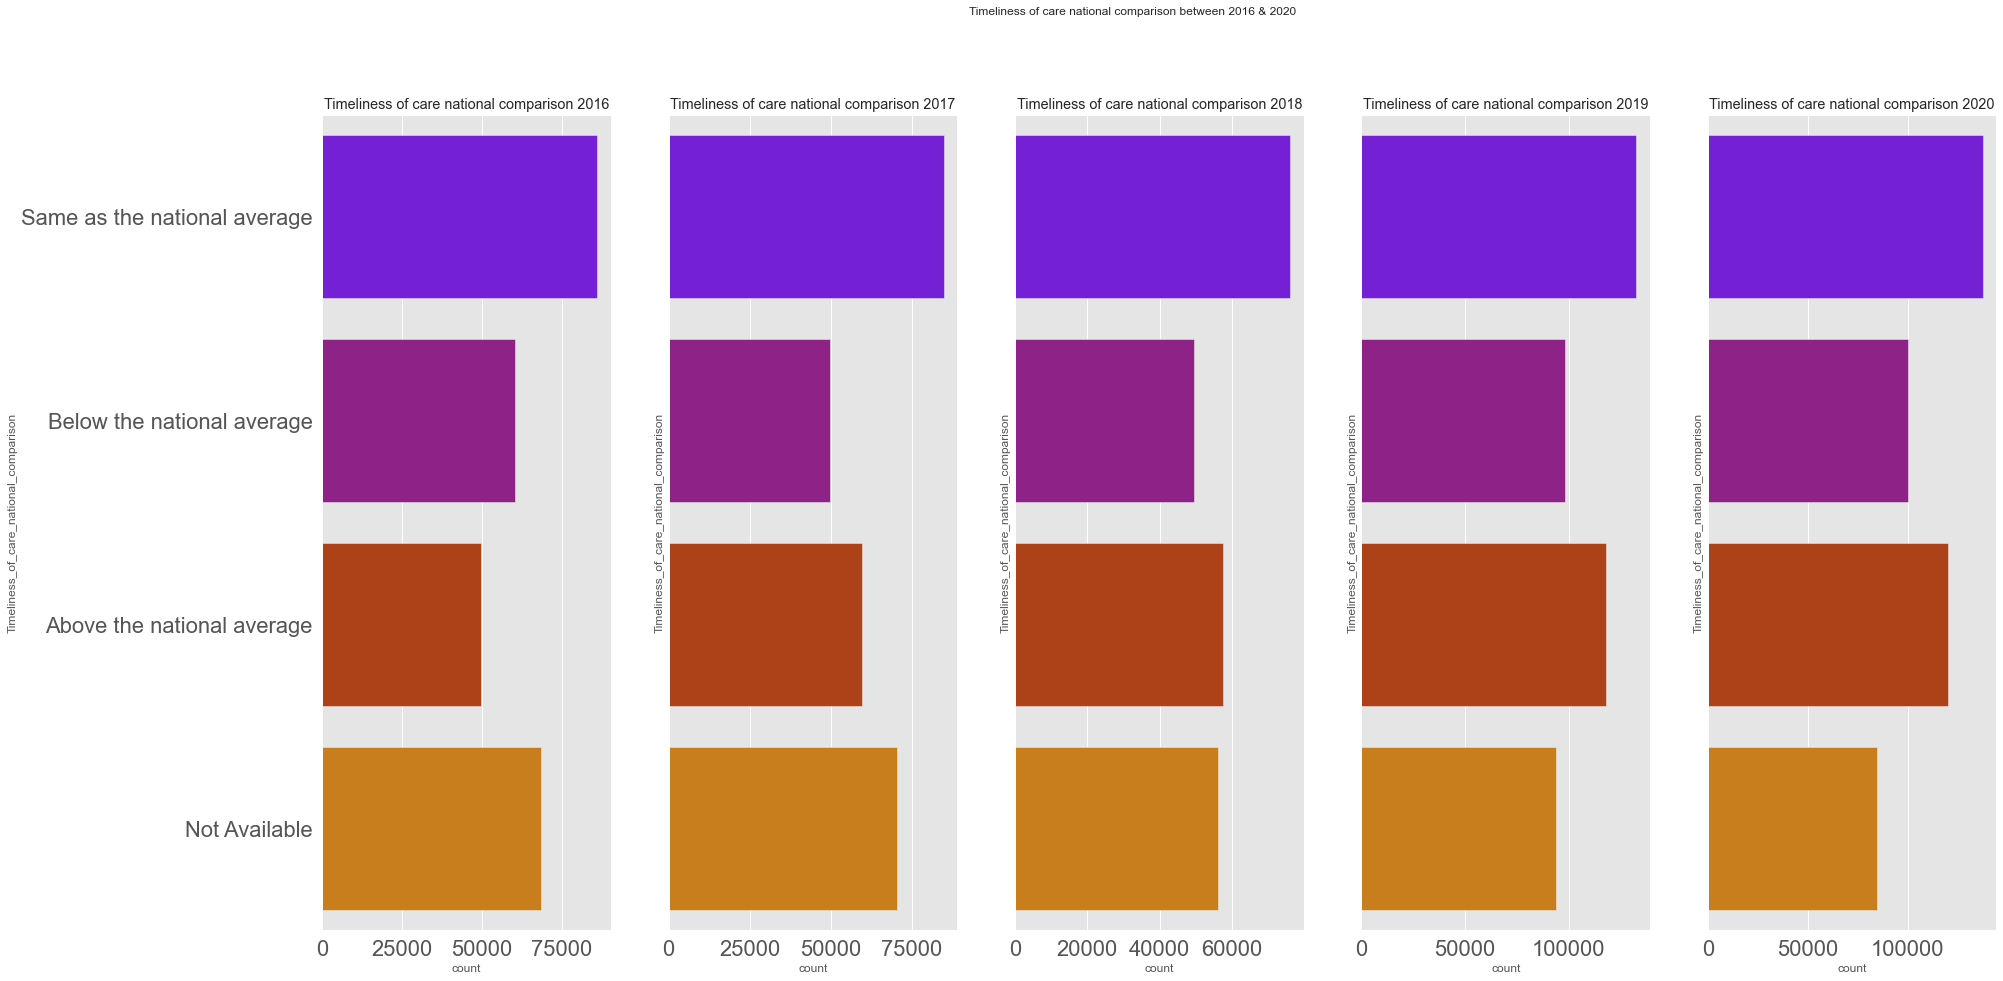

In [47]:
fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharey=True)
fig.suptitle('Timeliness of care national comparison between 2016 & 2020')

# 2016 data
df_ord = df_20162["Timeliness_of_care_national_comparison"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[0], y = df_2016.Timeliness_of_care_national_comparison, palette = "gnuplot", order = df_ord)
axes[0].set_title("Timeliness of care national comparison 2016")

# 2017 data
df_ord2 = df_20172["Timeliness_of_care_national_comparison"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[1], y = df_2017.Timeliness_of_care_national_comparison, palette = "gnuplot", order = df_ord2)
axes[1].set_title("Timeliness of care national comparison 2017")

# 2018 data
df_ord3 = df_20182["Timeliness_of_care_national_comparison"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[2], y = df_2018.Timeliness_of_care_national_comparison, palette = "gnuplot", order = df_ord3)
axes[2].set_title("Timeliness of care national comparison 2018")

# 2019 data
df_ord4 = df_20192["Timeliness_of_care_national_comparison"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[3], y = df_2019.Timeliness_of_care_national_comparison, palette = "gnuplot", order = df_ord4)
axes[3].set_title("Timeliness of care national comparison 2019")

# 2020 data
df_ord5 = df_20202["Timeliness_of_care_national_comparison"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[4], y = df_2020.Timeliness_of_care_national_comparison, palette = "gnuplot", order = df_ord5)
axes[4].set_title("Timeliness of care national comparison 2020")

In [48]:
df_2016["Efficient_use_of_medical_imaging_national_comparison"].value_counts()

Same as the National average    113245
Not Available                   110935
Below the National average       20515
Above the National average       19690
Name: Efficient_use_of_medical_imaging_national_comparison, dtype: int64

In [49]:
sns.set(font_scale = 2)
plt.style.use("ggplot")

Text(0.5, 1.0, 'Efficient use of medical imaging national comparison 2020')

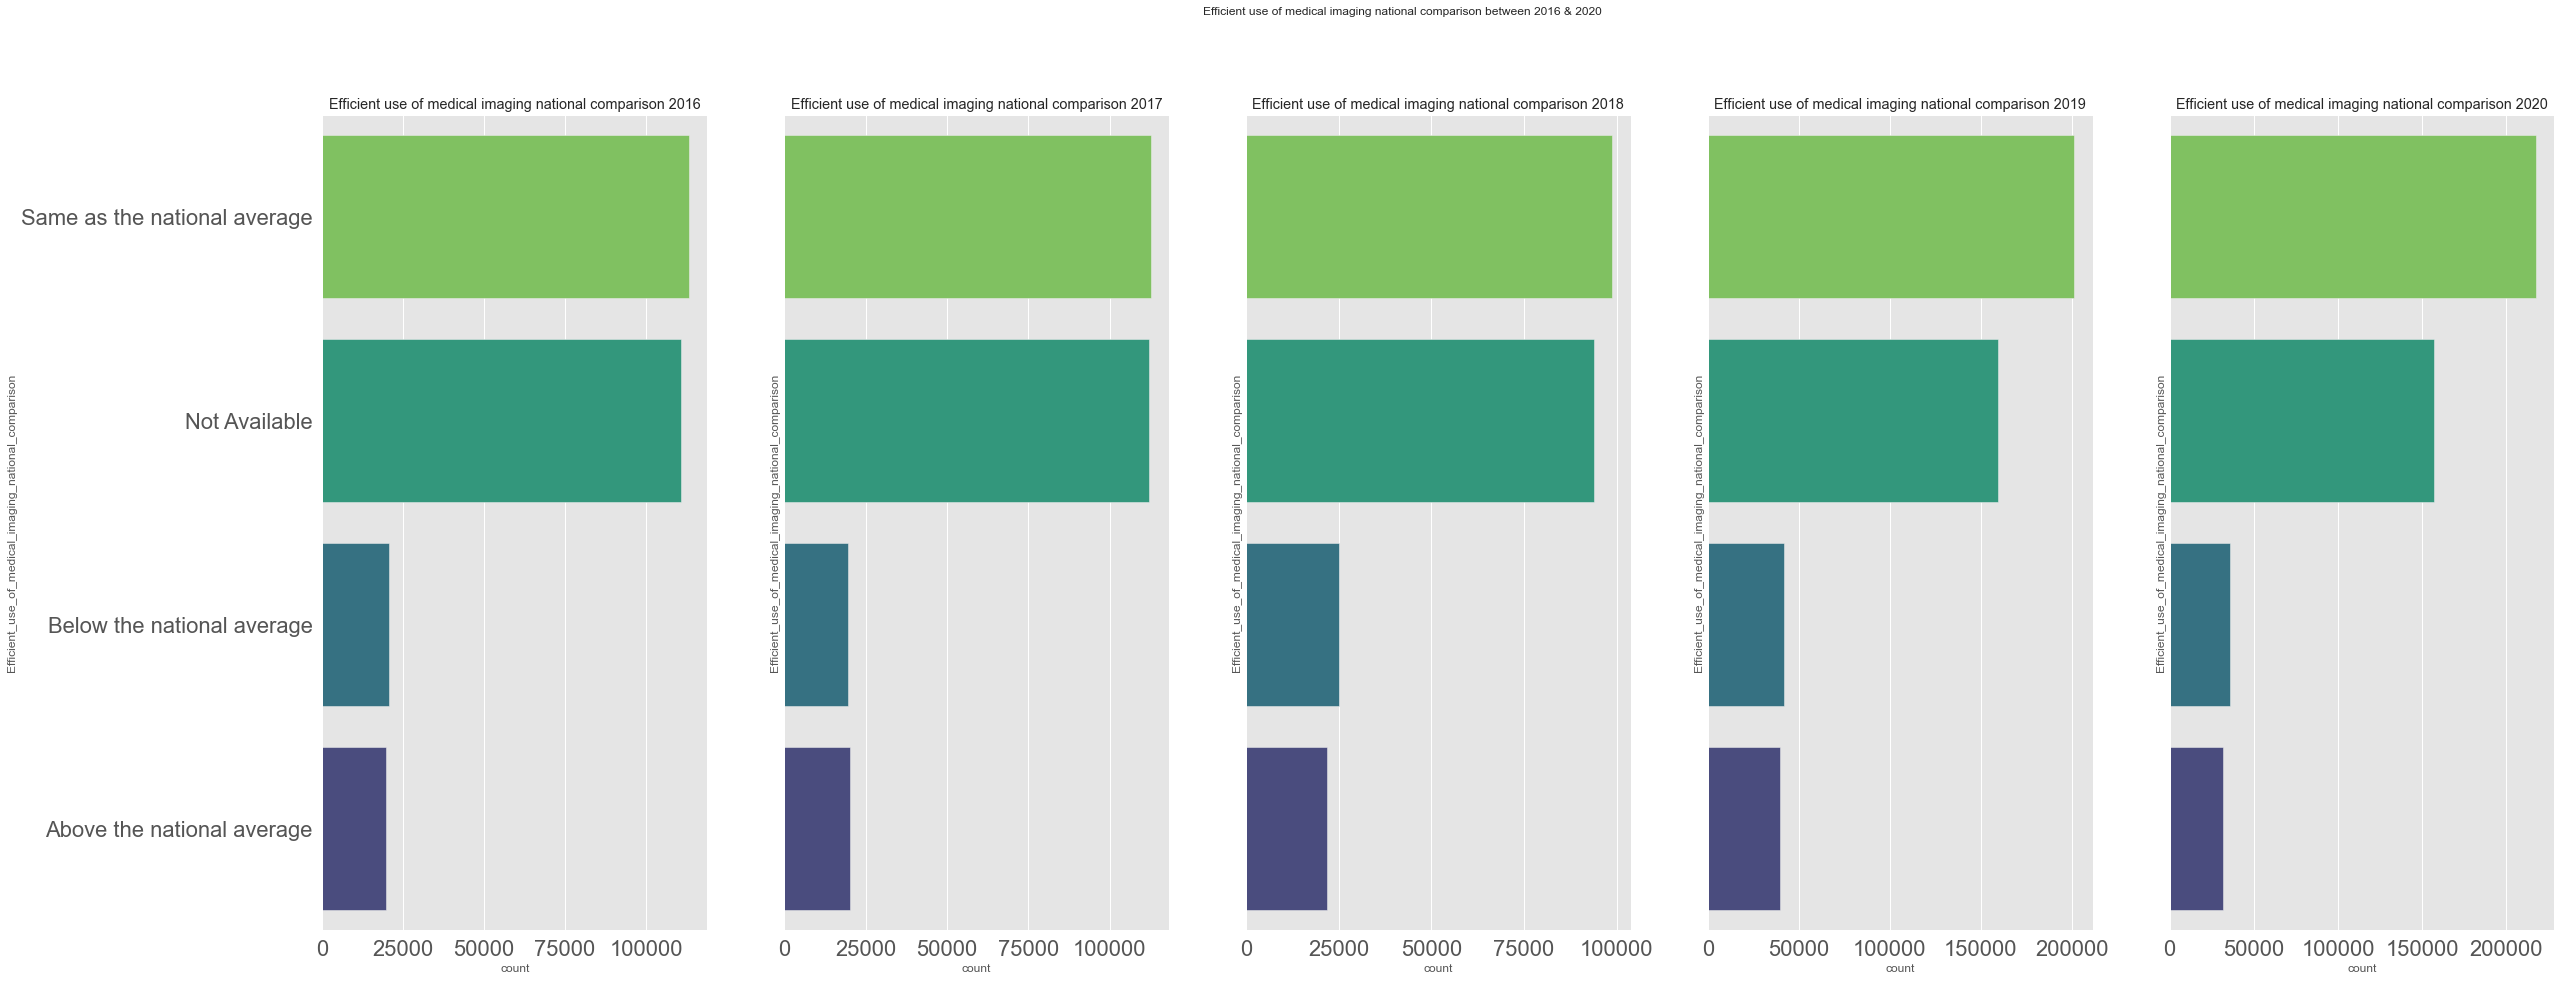

In [50]:
fig, axes = plt.subplots(1, 5, figsize=(40, 15), sharey=True)
fig.suptitle('Efficient use of medical imaging national comparison between 2016 & 2020')

# 2016 data
df_ord = df_20162["Efficient_use_of_medical_imaging_national_comparison"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[0], y = df_2016.Efficient_use_of_medical_imaging_national_comparison,
              palette = "viridis_r", order = df_ord)
axes[0].set_title("Efficient use of medical imaging national comparison 2016")

# 2017 data
df_ord2 = df_20172["Efficient_use_of_medical_imaging_national_comparison"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[1], y = df_2017.Efficient_use_of_medical_imaging_national_comparison,
              palette = "viridis_r", order = df_ord2)
axes[1].set_title("Efficient use of medical imaging national comparison 2017")

# 2018 data
df_ord3 = df_20182["Efficient_use_of_medical_imaging_national_comparison"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[2], y = df_2018.Efficient_use_of_medical_imaging_national_comparison,
              palette = "viridis_r", order = df_ord3)
axes[2].set_title("Efficient use of medical imaging national comparison 2018")

# 2019 data
df_ord4 = df_20192["Efficient_use_of_medical_imaging_national_comparison"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[3], y = df_2019.Efficient_use_of_medical_imaging_national_comparison,
              palette = "viridis_r", order = df_ord4)
axes[3].set_title("Efficient use of medical imaging national comparison 2019")

# 2020 data
df_ord5 = df_20202["Efficient_use_of_medical_imaging_national_comparison"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[4], y = df_2020.Efficient_use_of_medical_imaging_national_comparison,
              palette = "viridis_r", order = df_ord5)
axes[4].set_title("Efficient use of medical imaging national comparison 2020")

In [51]:
df_2016["State"].value_counts()

TX    22385
CA    18755
FL    10230
IL     9900
NY     9460
PA     9350
OH     9240
KS     7535
GA     7370
MI     7205
MN     7205
WI     6930
OK     6765
LA     6710
IN     6600
IA     6380
MO     6270
TN     5995
NC     5830
MS     5280
KY     5170
WA     5005
NE     4950
AL     4895
VA     4785
AZ     4455
CO     4290
AR     4070
NJ     3630
MA     3520
MT     3355
SD     3300
SC     3300
OR     3300
PR     2860
WV     2695
MD     2695
UT     2530
ND     2420
ID     2255
NM     2255
NV     1815
ME     1815
CT     1705
WY     1485
NH     1430
HI     1265
AK     1210
VT      770
RI      605
DC      440
DE      385
VI      110
GU      110
AS       55
MP       55
Name: State, dtype: int64

In [52]:
sns.set(font_scale = 2)
plt.style.use("ggplot")

Text(0.5, 1.0, 'Quantity of hospitals 2020')

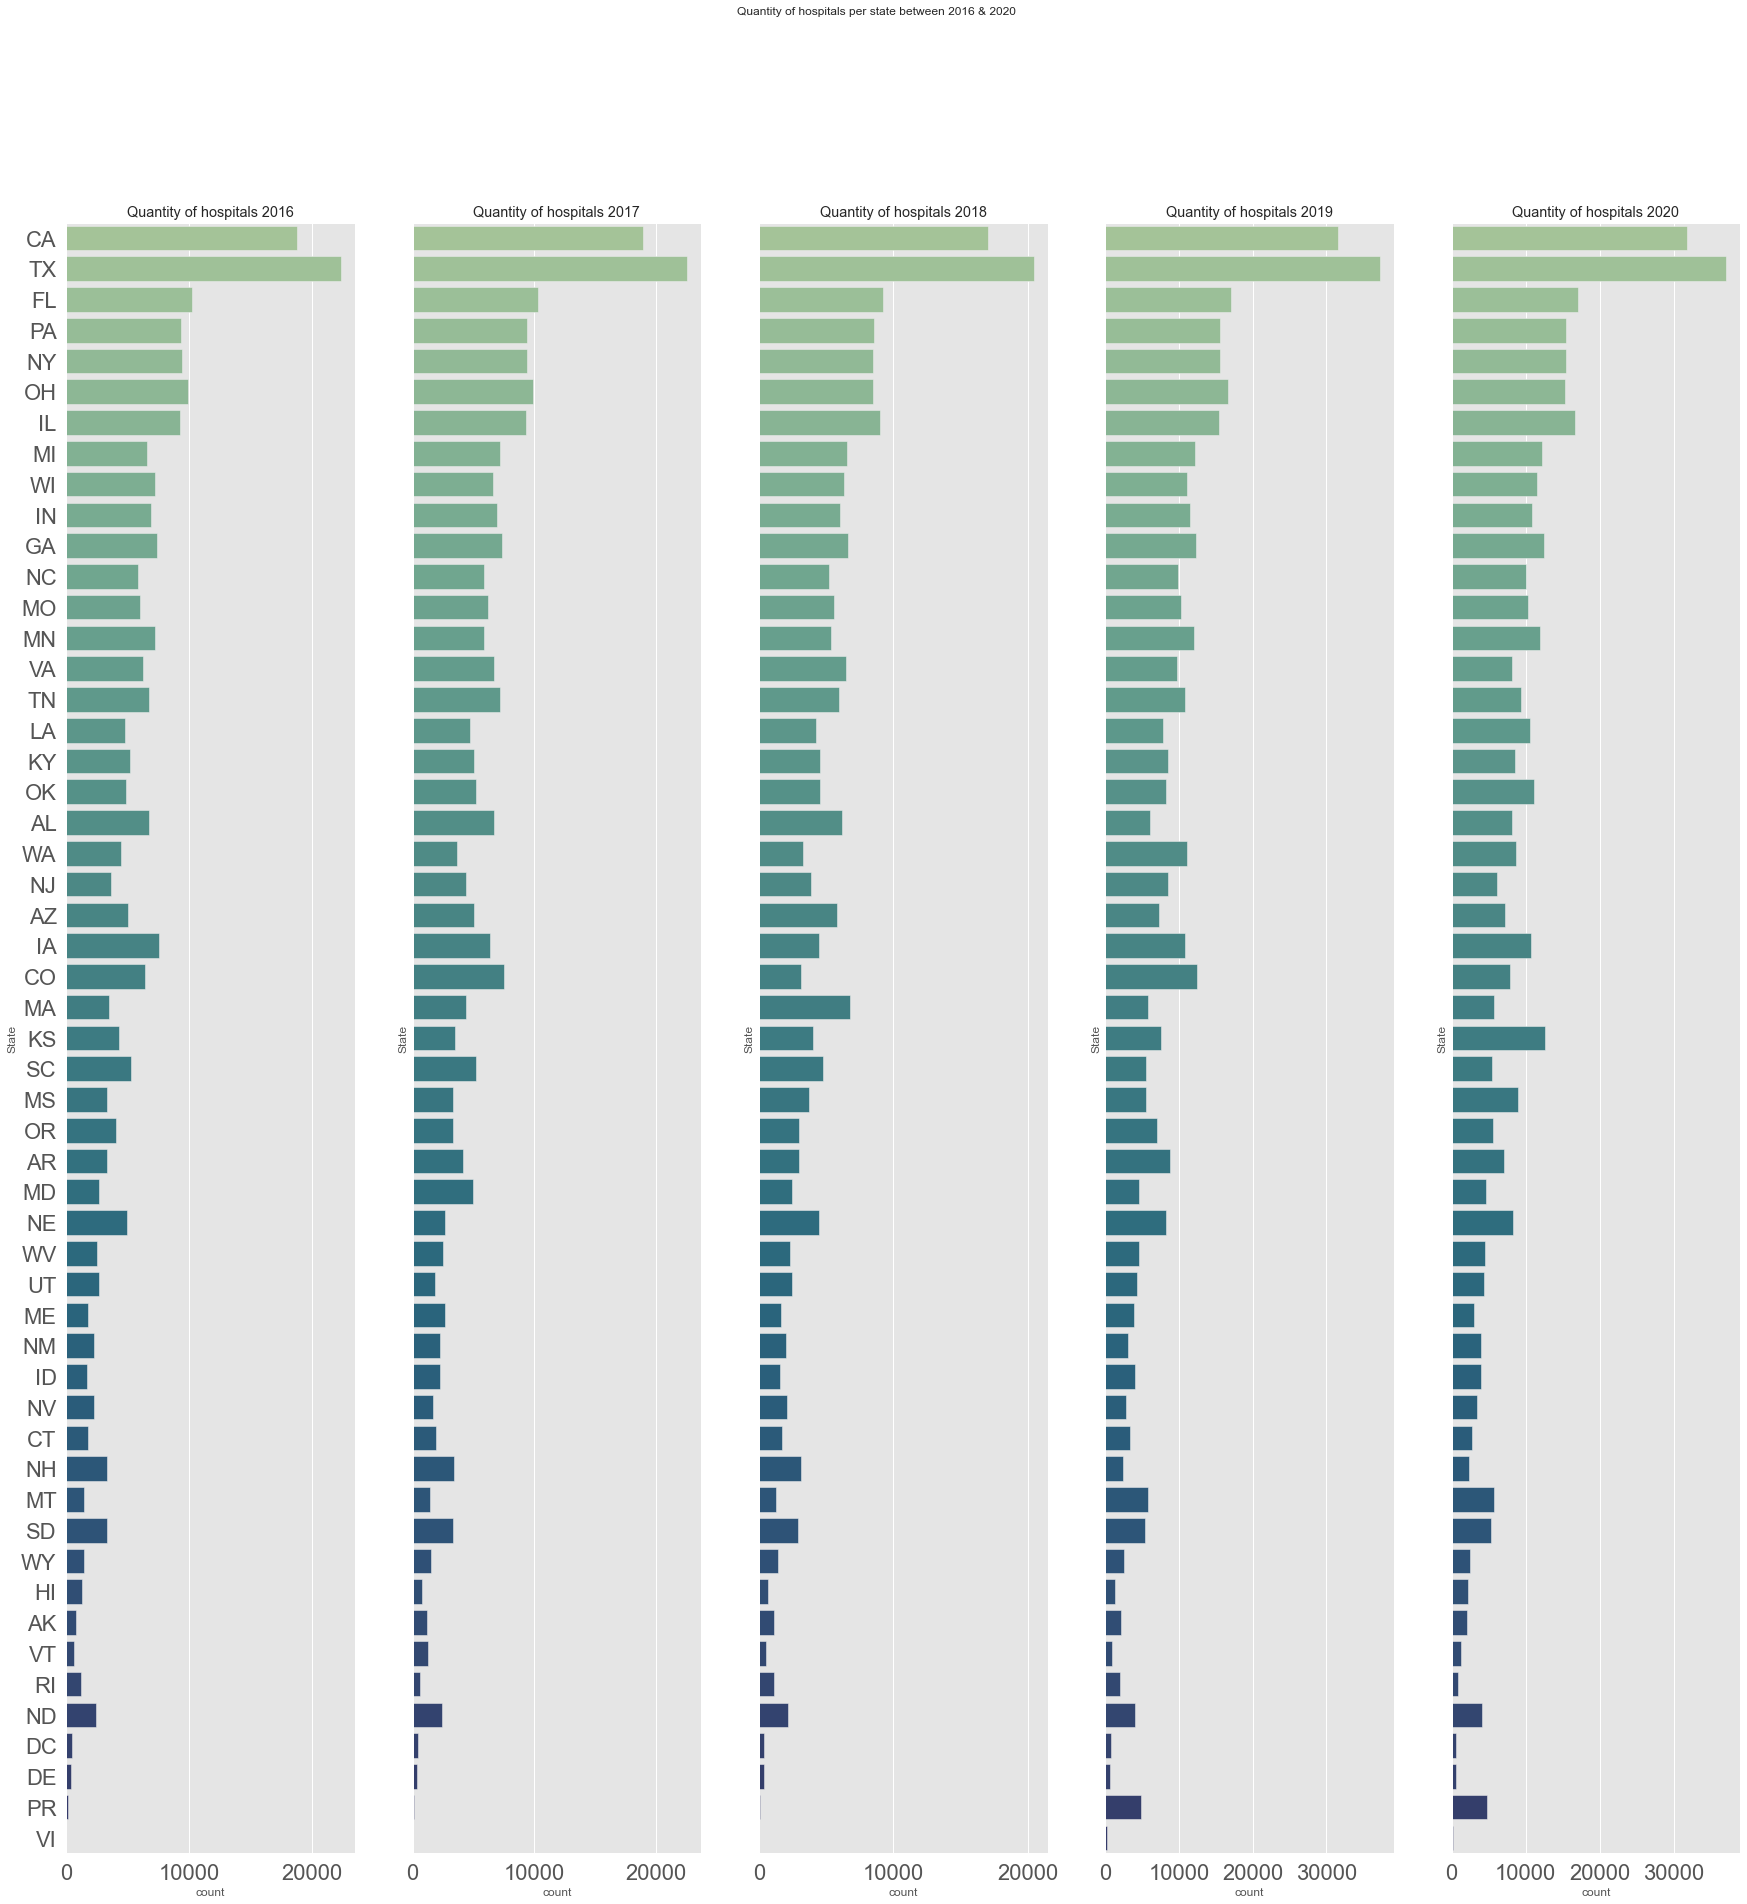

In [53]:
fig, axes = plt.subplots(1, 5, figsize=(30, 30), sharey=True)
fig.suptitle('Quantity of hospitals per state between 2016 & 2020')

# 2016 data
df_ord = df_20162["State"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[0], y = df_2016.State, palette = "crest", order = df_ord)
axes[0].set_title("Quantity of hospitals 2016")

# 2017 data
df_ord2 = df_20172["State"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[1], y = df_2017.State, palette = "crest", order = df_ord2)
axes[1].set_title("Quantity of hospitals 2017")

# 2018 data
df_ord3 = df_20182["State"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[2], y = df_2018.State, palette = "crest", order = df_ord3)
axes[2].set_title("Quantity of hospitals 2018")

# 2019 data
df_ord4 = df_20192["State"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[3], y = df_2019.State, palette = "crest", order = df_ord4)
axes[3].set_title("Quantity of hospitals 2019")

# 2020 data
df_ord5 = df_20202["State"].value_counts().sort_values(ascending = False).index
sns.countplot(ax = axes[4], y = df_2020.State, palette = "crest", order = df_ord5)
axes[4].set_title("Quantity of hospitals 2020")

In [54]:
# Top 10 cities with most hospitals
df_2016["City"].value_counts()

CHICAGO         1595
HOUSTON         1430
LOS ANGELES     1100
DALLAS          1045
PHILADELPHIA    1045
                ... 
LAURINBURG        55
HONOKAA           55
COZAD             55
CAVALIER          55
PLACENTIA         55
Name: City, Length: 2947, dtype: int64

<AxesSubplot:title={'center':'Top 10 cities with most hospitals'}, xlabel='count', ylabel='City'>

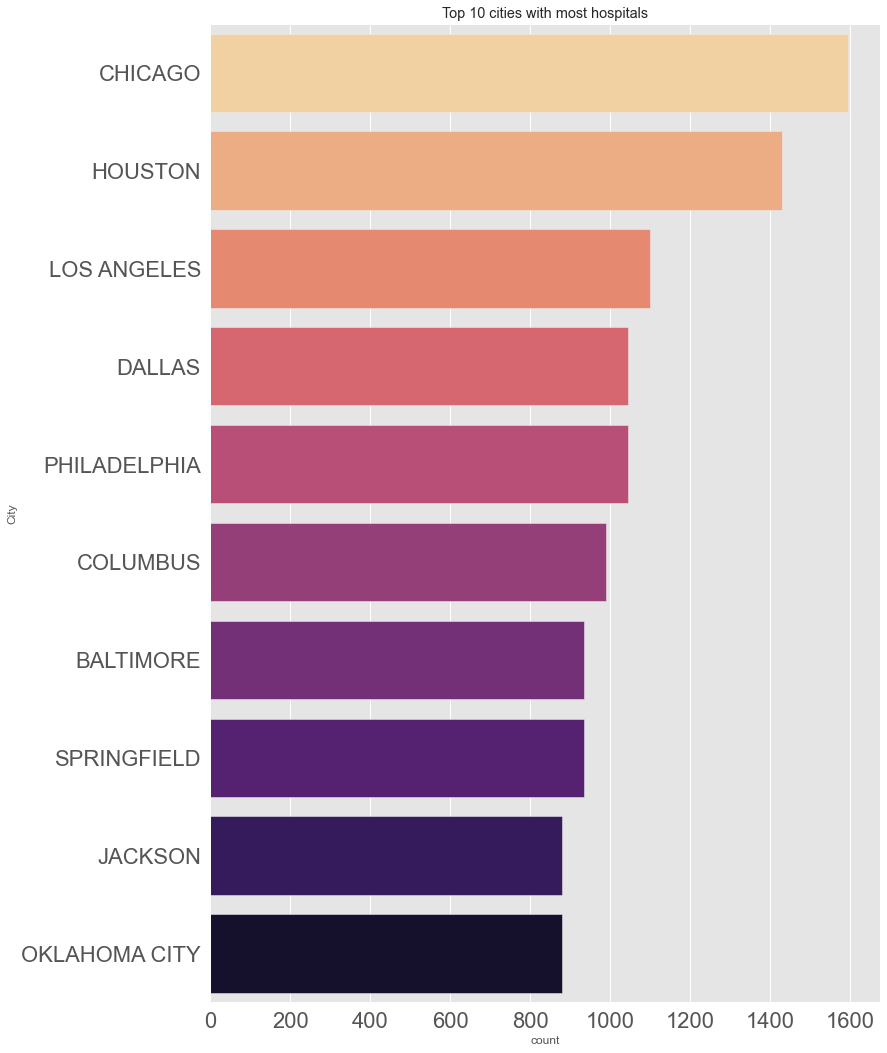

In [55]:
# Top 10 cities with most hospitals 2016 plot
plt.figure(figsize = (12,18))
plt.title("Top 10 cities with most hospitals")
city_order = df_2016["City"].value_counts().sort_values(ascending = False)[:10].index
sns.countplot(y = df_2016["City"], palette = "magma_r", order = city_order)


In [56]:
sns.set(font_scale = 2)
plt.style.use("ggplot")

Text(0.5, 1.0, 'Top 10 cities with most hospitals 2020')

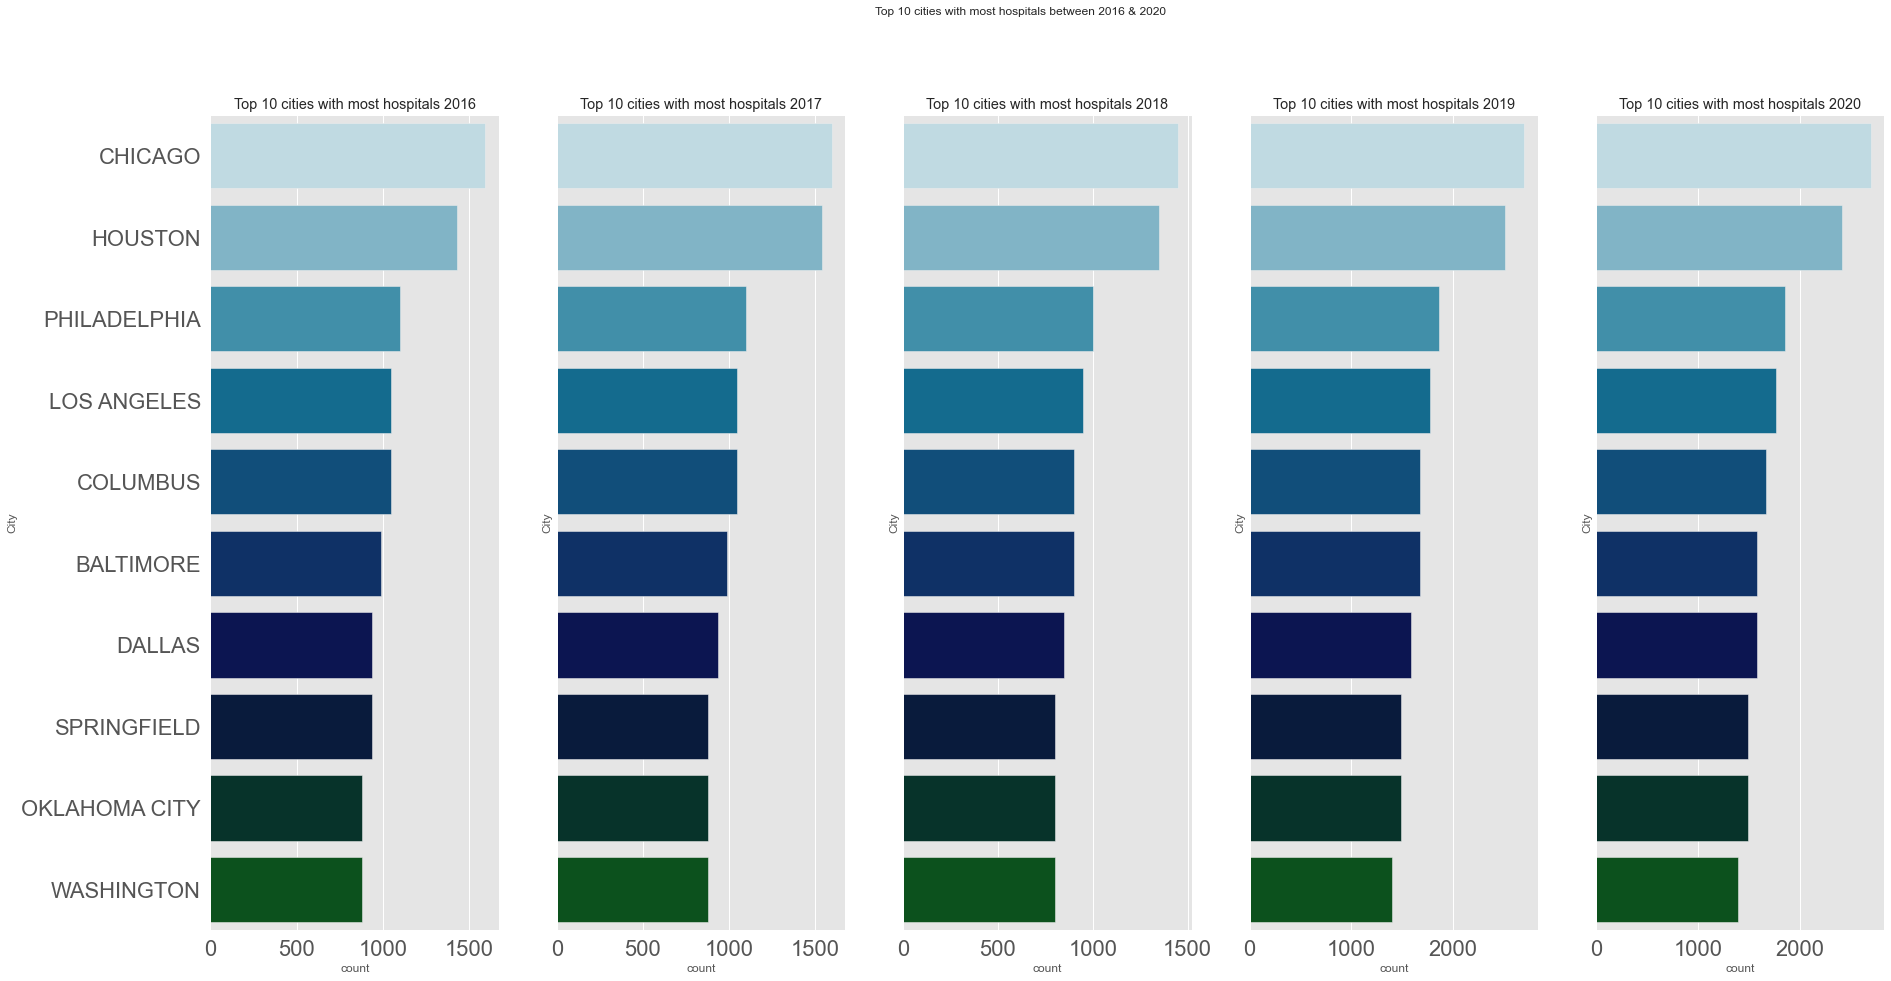

In [57]:
fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharey=True)
fig.suptitle('Top 10 cities with most hospitals between 2016 & 2020')

# 2016 data
city_order_2016 = df_2016["City"].value_counts().sort_values(ascending = False)[:10].index
sns.countplot(ax = axes[0], y = df_2016["City"], palette = "ocean_r", order = city_order_2016)
axes[0].set_title("Top 10 cities with most hospitals 2016")

# 2017 data
city_order_2017 = df_2017["City"].value_counts().sort_values(ascending = False)[:10].index
sns.countplot(ax = axes[1], y = df_2017["City"], palette = "ocean_r", order = city_order_2017)
axes[1].set_title("Top 10 cities with most hospitals 2017")

# 2018 data
city_order_2018 = df_2018["City"].value_counts().sort_values(ascending = False)[:10].index
sns.countplot(ax = axes[2], y = df_2018["City"], palette = "ocean_r", order = city_order_2018)
axes[2].set_title("Top 10 cities with most hospitals 2018")

# 2019 data
city_order_2019 = df_2019["City"].value_counts().sort_values(ascending = False)[:10].index
sns.countplot(ax = axes[3], y = df_2019["City"], palette = "ocean_r", order = city_order_2019)
axes[3].set_title("Top 10 cities with most hospitals 2019")

# 2020 data
city_order_2020 = df_2020["City"].value_counts().sort_values(ascending = False)[:10].index
sns.countplot(ax = axes[4], y = df_2020["City"], palette = "ocean_r", order = city_order_2020)
axes[4].set_title("Top 10 cities with most hospitals 2020")

In [58]:
sns.set(font_scale = 1)
plt.style.use("ggplot")

Text(0.5, 1.0, 'Top 10 states with overall rating 2020')

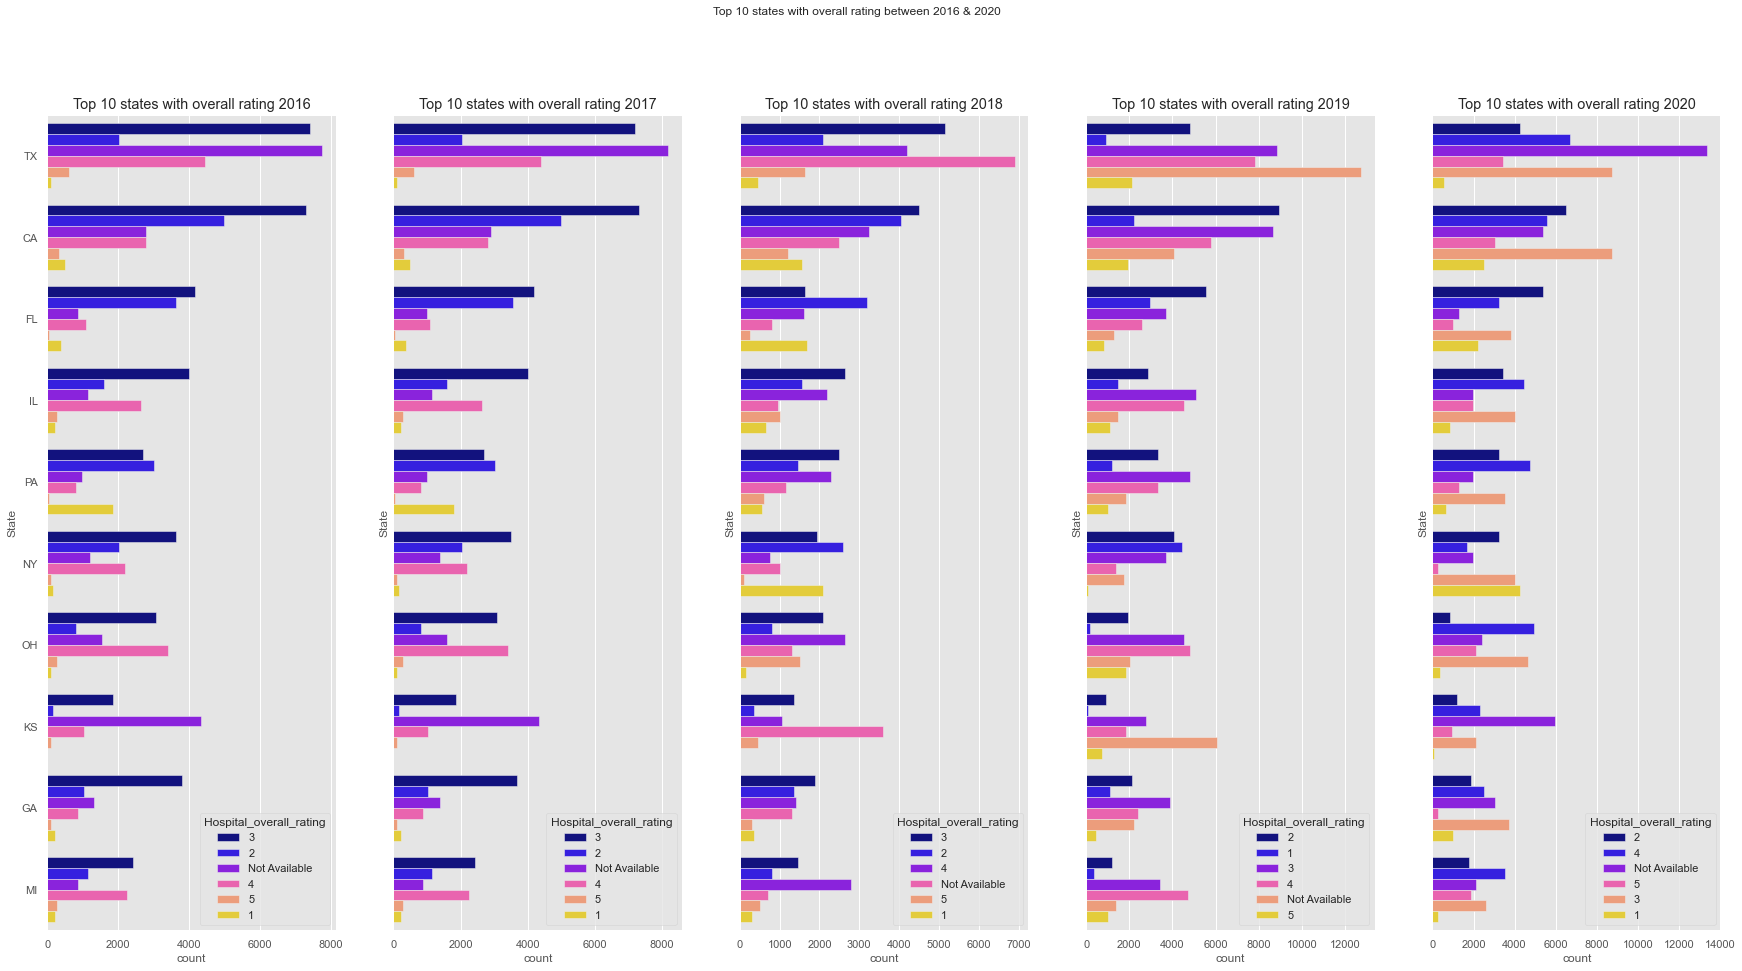

In [59]:
fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharey=True)
fig.suptitle('Top 10 states with overall rating between 2016 & 2020')

# 2016 data
state_order_2016 = df_2016["State"].value_counts().sort_values(ascending = False)[:10].index
sns.countplot(ax = axes[0], y = df_2016["State"], palette = "gnuplot2", order = state_order_2016,
              data = df_2016, hue = "Hospital_overall_rating")
axes[0].set_title("Top 10 states with overall rating 2016")

# 2017 data
state_order_2017 = df_2017["State"].value_counts().sort_values(ascending = False)[:10].index
sns.countplot(ax = axes[1], y = df_2017["State"], palette = "gnuplot2", order = state_order_2017,
              data = df_2017, hue = "Hospital_overall_rating")
axes[1].set_title("Top 10 states with overall rating 2017")

# 2018 data
state_order_2018 = df_2018["State"].value_counts().sort_values(ascending = False)[:10].index
sns.countplot(ax = axes[2], y = df_2018["State"], palette = "gnuplot2", order = state_order_2018,
              data = df_2018, hue = "Hospital_overall_rating")
axes[2].set_title("Top 10 states with overall rating 2018")

# 2019 data
state_order_2019 = df_2019["State"].value_counts().sort_values(ascending = False)[:10].index
sns.countplot(ax = axes[3], y = df_2019["State"], palette = "gnuplot2", order = state_order_2019,
              data = df_2019, hue = "Hospital_overall_rating")
axes[3].set_title("Top 10 states with overall rating 2019")

# 2020 data
state_order_2020 = df_2020["State"].value_counts().sort_values(ascending = False)[:10].index
sns.countplot(ax = axes[4], y = df_2020["State"], palette = "gnuplot2", order = state_order_2020,
              data = df_2020, hue = "Hospital_overall_rating")
axes[4].set_title("Top 10 states with overall rating 2020")

In [60]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264385 entries, 0 to 264384
Data columns (total 15 columns):
 #   Column                                                Non-Null Count   Dtype 
---  ------                                                --------------   ----- 
 0   Facility_Name                                         264385 non-null  object
 1   City                                                  264385 non-null  object
 2   State                                                 264385 non-null  object
 3   Patient_Survey_Star_Rating                            264385 non-null  object
 4   Hospital_Type                                         264385 non-null  object
 5   Hospital_Ownership                                    264385 non-null  object
 6   Emergency_Services                                    264385 non-null  object
 7   Hospital_overall_rating                               264385 non-null  object
 8   Mortality_national_comparison                         

In [61]:
sns.set(font_scale = 2)
plt.style.use("ggplot")

Text(0.5, 1.0, 'Top 10 Facilitys between USA 2020')

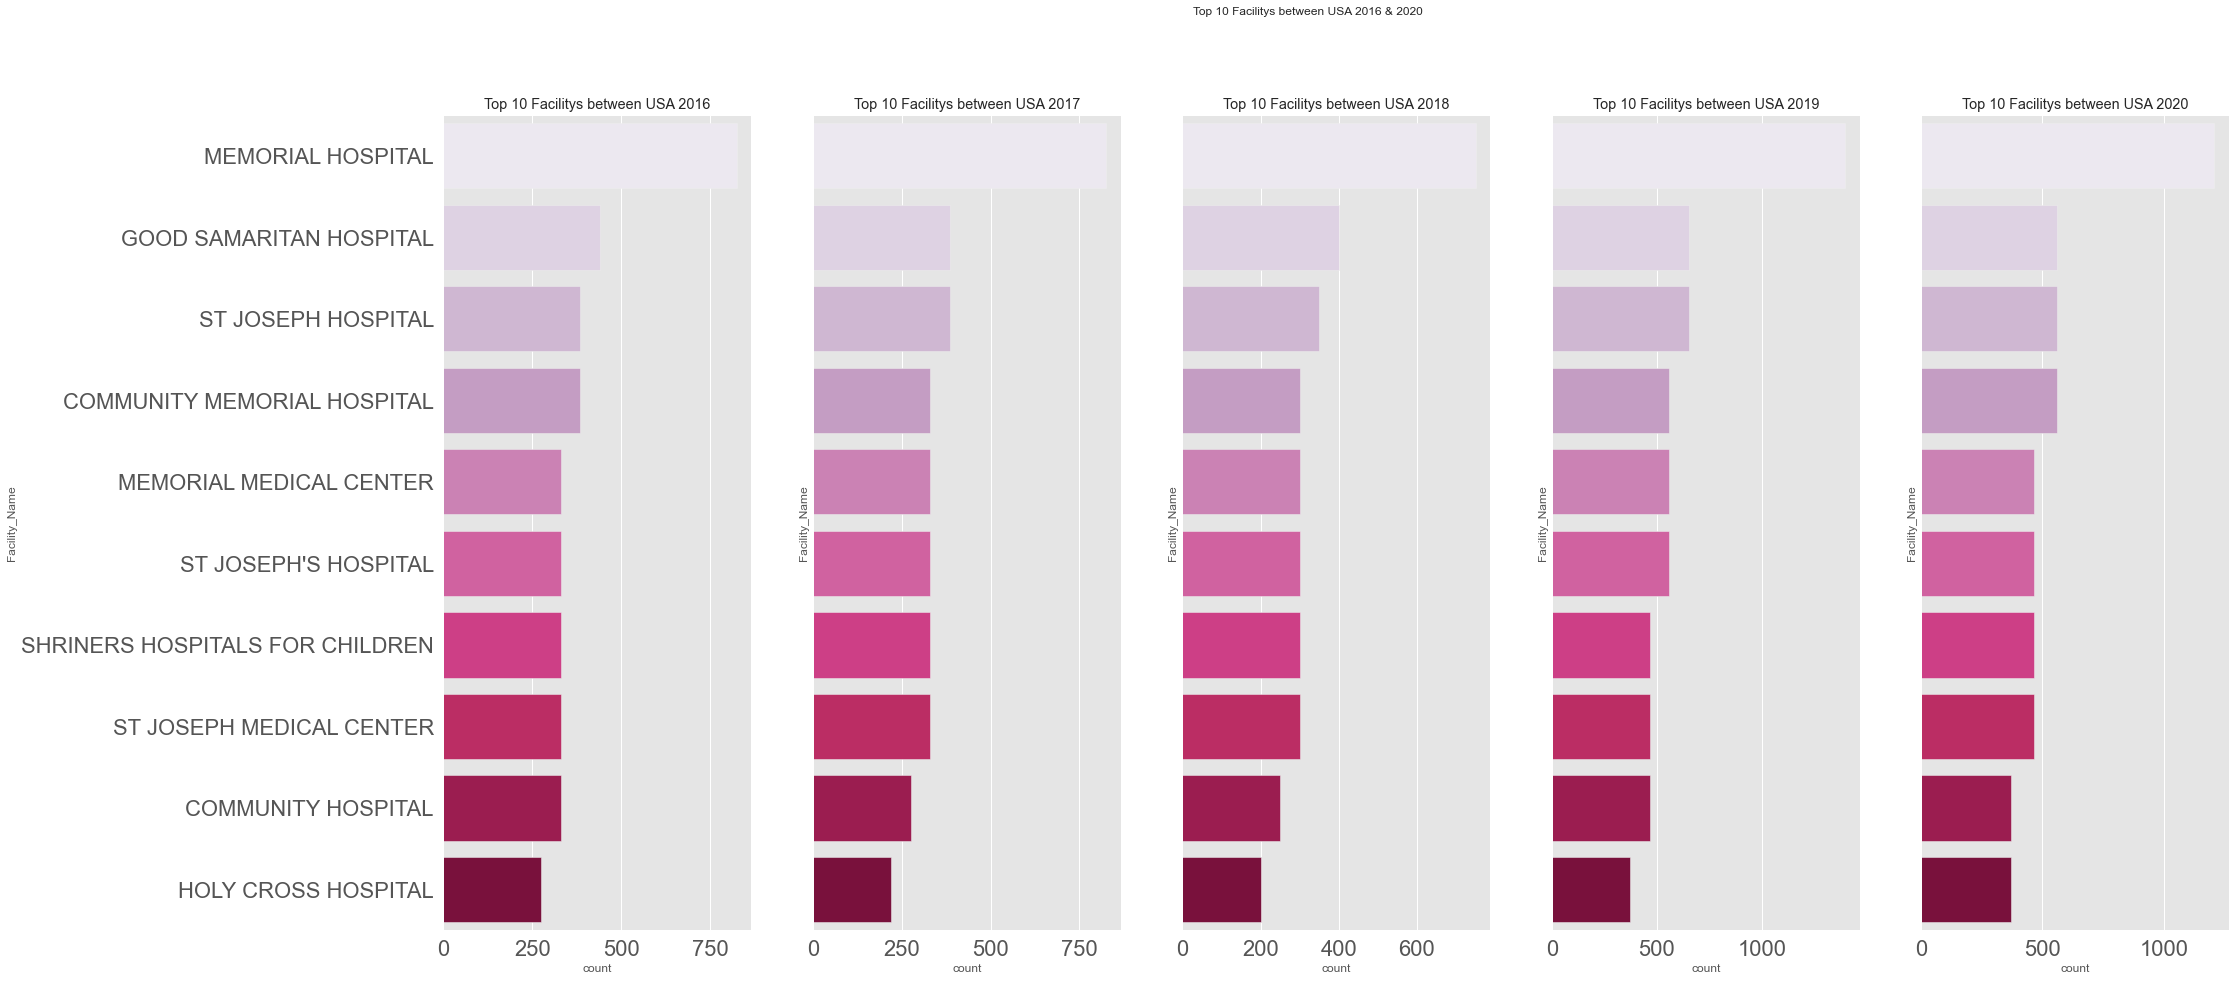

In [62]:
fig, axes = plt.subplots(1, 5, figsize=(32, 15), sharey=True)
fig.suptitle('Top 10 Facilitys between USA 2016 & 2020')

# 2016 data
facility_order_2016 = df_2016["Facility_Name"].value_counts().sort_values(ascending = False)[:10].index
sns.countplot(ax = axes[0], y = df_2016["Facility_Name"], palette = "PuRd", order = facility_order_2016)
axes[0].set_title("Top 10 Facilitys between USA 2016")

# 2017 data
facility_order_2017 = df_2017["Facility_Name"].value_counts().sort_values(ascending = False)[:10].index
sns.countplot(ax = axes[1], y = df_2017["Facility_Name"], palette = "PuRd", order = facility_order_2017)
axes[1].set_title("Top 10 Facilitys between USA 2017")

# 2018 data
facility_order_2018 = df_2018["Facility_Name"].value_counts().sort_values(ascending = False)[:10].index
sns.countplot(ax = axes[2], y = df_2018["Facility_Name"], palette = "PuRd", order = facility_order_2018)
axes[2].set_title("Top 10 Facilitys between USA 2018")

# 2019 data
facility_order_2019 = df_2019["Facility_Name"].value_counts().sort_values(ascending = False)[:10].index
sns.countplot(ax = axes[3], y = df_2019["Facility_Name"], palette = "PuRd", order = facility_order_2019)
axes[3].set_title("Top 10 Facilitys between USA 2019")

# 2020 data
facility_order_2020 = df_2020["Facility_Name"].value_counts().sort_values(ascending = False)[:10].index
sns.countplot(ax = axes[4], y = df_2020["Facility_Name"], palette = "PuRd", order = facility_order_2020)
axes[4].set_title("Top 10 Facilitys between USA 2020")

In [63]:
df_2016 = df_2016.drop(df_2016[df_2016["Hospital_overall_rating"] == "Not Available"].index)
df_2017 = df_2017.drop(df_2017[df_2017["Hospital_overall_rating"] == "Not Available"].index)
df_2018 = df_2018.drop(df_2018[df_2018["Hospital_overall_rating"] == "Not Available"].index)
df_2019 = df_2019.drop(df_2019[df_2019["Hospital_overall_rating"] == "Not Available"].index)
df_2020 = df_2020.drop(df_2020[df_2020["Hospital_overall_rating"] == "Not Available"].index)

In [64]:
df_2016['Hospital_overall_rating'] = df_2016['Hospital_overall_rating'].astype(float, errors = 'raise')
df_2017['Hospital_overall_rating'] = df_2017['Hospital_overall_rating'].astype(float, errors = 'raise')
df_2018['Hospital_overall_rating'] = df_2018['Hospital_overall_rating'].astype(float, errors = 'raise')
df_2019['Hospital_overall_rating'] = df_2019['Hospital_overall_rating'].astype(float, errors = 'raise')
df_2020['Hospital_overall_rating'] = df_2020['Hospital_overall_rating'].astype(float, errors = 'raise')
print(df_2016.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197120 entries, 0 to 263834
Data columns (total 15 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   Facility_Name                                         197120 non-null  object 
 1   City                                                  197120 non-null  object 
 2   State                                                 197120 non-null  object 
 3   Patient_Survey_Star_Rating                            197120 non-null  object 
 4   Hospital_Type                                         197120 non-null  object 
 5   Hospital_Ownership                                    197120 non-null  object 
 6   Emergency_Services                                    197120 non-null  object 
 7   Hospital_overall_rating                               197120 non-null  float64
 8   Mortality_national_comparison               

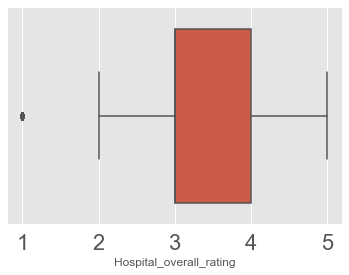

In [65]:
ax = sns.boxplot(x = "Hospital_overall_rating", data = df_2016)

In [66]:
sns.set(font_scale = 2)
plt.style.use("ggplot")

Text(0.5, 1.0, 'overall rating 2020')

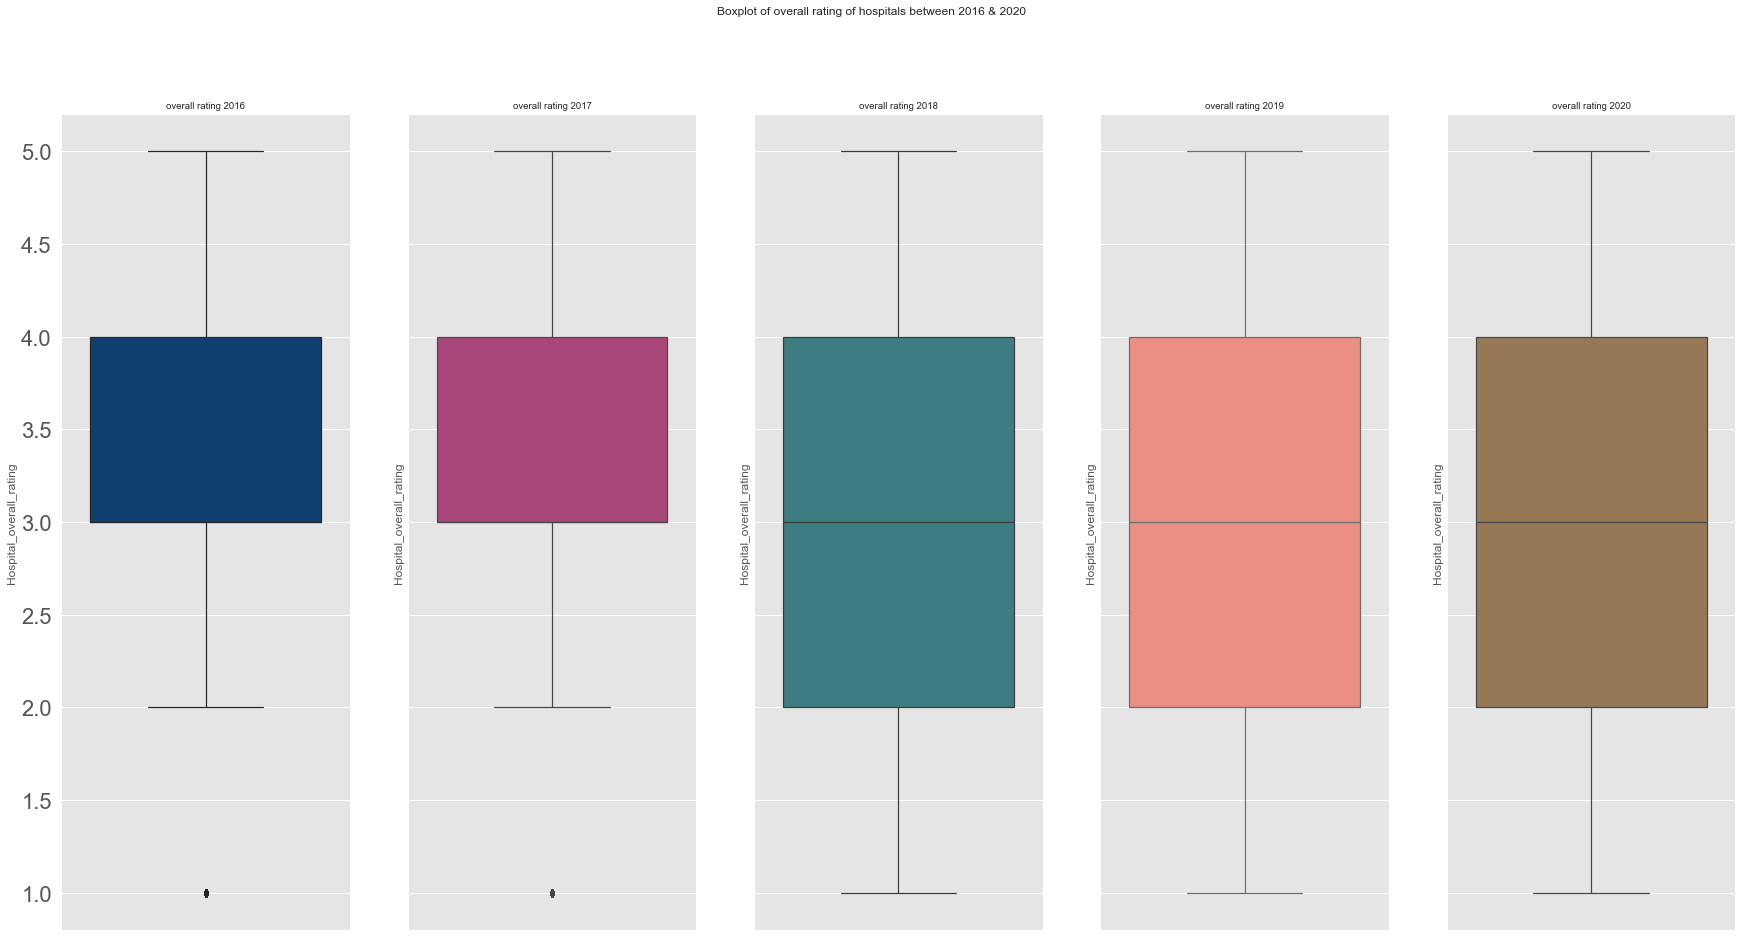

In [67]:
fig, axes = plt.subplots(1, 5, figsize = (30, 15), sharey = True)
fig.suptitle('Boxplot of overall rating of hospitals between 2016 & 2020')

sns.set_context('paper')
sns.boxplot(ax = axes[0], y = df_2016.Hospital_overall_rating, palette = "ocean")
axes[0].set_title("overall rating 2016")

# 2017 data
sns.boxplot(ax = axes[1], y = df_2017.Hospital_overall_rating, palette = "magma")
axes[1].set_title("overall rating 2017")

# 2018 data
sns.boxplot(ax = axes[2], y = df_2018.Hospital_overall_rating, palette = "crest")
axes[2].set_title("overall rating 2018")

# 2019 data
sns.boxplot(ax = axes[3], y = df_2019.Hospital_overall_rating, palette = "dark:salmon_r")
axes[3].set_title("overall rating 2019")

# 2020 data
sns.boxplot(ax = axes[4], y = df_2020.Hospital_overall_rating, palette = "cubehelix")
axes[4].set_title("overall rating 2020")

In [68]:
len_emg_serv6 = len(df_2016[df_2016["Emergency_Services"] == "No"])
len_emg_serv7 = len(df_2017[df_2017["Emergency_Services"] == "No"])
len_emg_serv8 = len(df_2018[df_2018["Emergency_Services"] == "No"])
len_emg_serv9 = len(df_2019[df_2019["Emergency_Services"] == "No"])
len_emg_serv10 = len(df_2020[df_2020["Emergency_Services"] == "No"])

print(len_emg_serv6,len_emg_serv7, len_emg_serv8, len_emg_serv9, len_emg_serv10)

4125 5170 8750 15066 12369


In [69]:
prob_emg_serv_2016 = 4125/len(df_2016[df_2016["Emergency_Services"] == "Yes"]) * 100
prob_emg_serv_2017 = 5170/len(df_2016[df_2016["Emergency_Services"] == "Yes"]) * 100
prob_emg_serv_2018 = 8750/len(df_2016[df_2016["Emergency_Services"] == "Yes"]) * 100
prob_emg_serv_2019 = 15066/len(df_2016[df_2016["Emergency_Services"] == "Yes"]) * 100
prob_emg_serv_2020 = 12369/len(df_2016[df_2016["Emergency_Services"] == "Yes"]) * 100

print(prob_emg_serv_2016, prob_emg_serv_2017, prob_emg_serv_2018, prob_emg_serv_2019, prob_emg_serv_2020)

2.1373610715303504 2.6788258763180393 4.533796212337108 7.806419855436669 6.408974325759735


In [70]:
state_rtg1 = df_2016[df_2016["State"] == "TX"]["Hospital_overall_rating"].value_counts()
state_rtg2 = df_2017[df_2017["State"] == "TX"]["Hospital_overall_rating"].value_counts()
state_rtg3 = df_2018[df_2018["State"] == "TX"]["Hospital_overall_rating"].value_counts()
state_rtg4 = df_2019[df_2019["State"] == "TX"]["Hospital_overall_rating"].value_counts()
state_rtg5 = df_2020[df_2020["State"] == "TX"]["Hospital_overall_rating"].value_counts()

print(state_rtg1, state_rtg2, state_rtg3, state_rtg4, state_rtg5)

3.0    7425
4.0    4455
2.0    2035
5.0     605
1.0     110
Name: Hospital_overall_rating, dtype: int64 3.0    7205
4.0    4400
2.0    2035
5.0     605
1.0     110
Name: Hospital_overall_rating, dtype: int64 3.0    5150
4.0    4200
2.0    2100
5.0    1650
1.0     450
Name: Hospital_overall_rating, dtype: int64 3.0    8835
4.0    7812
2.0    4836
5.0    2139
1.0     930
Name: Hospital_overall_rating, dtype: int64 3.0    8742
4.0    6696
2.0    4278
5.0    3441
1.0     558
Name: Hospital_overall_rating, dtype: int64


In [71]:
df_2016["Hospital_overall_rating"].value_counts()

3.0    97570
4.0    51755
2.0    37345
1.0     5940
5.0     4510
Name: Hospital_overall_rating, dtype: int64

In [72]:
df_2017["Hospital_overall_rating"].value_counts()

3.0    96525
4.0    51590
2.0    37290
1.0     5885
5.0     4510
Name: Hospital_overall_rating, dtype: int64

In [73]:
df_2018["Hospital_overall_rating"].value_counts()

3.0    58900
4.0    57650
2.0    37500
5.0    16750
1.0    12950
Name: Hospital_overall_rating, dtype: int64

In [74]:
df_2019["Hospital_overall_rating"].value_counts()

3.0    116529
4.0    100719
2.0     73563
5.0     27063
1.0     26040
Name: Hospital_overall_rating, dtype: int64

In [75]:
df_2020["Hospital_overall_rating"].value_counts()

4.0    105648
3.0    102858
2.0     65286
5.0     37851
1.0     20925
Name: Hospital_overall_rating, dtype: int64

In [76]:
texas_rtg_prob1 = (605/14630)
texas_usa_prob1 = (14630/197120)
texas_rtg_usa_prob1 = (texas_rtg_prob1*texas_usa_prob1)*100
texas_rtg_usa_prob1

texas_rtg_prob2 = (605/14355)
texas_usa_prob2 = (14355/530800)
texas_rtg_usa_prob2 = (texas_rtg_prob2*texas_usa_prob2)*100
texas_rtg_usa_prob2

texas_rtg_prob3 = (1650/13550)
texas_usa_prob3 = (13550/183750)
texas_rtg_usa_prob3 = (texas_rtg_prob3*texas_usa_prob3)*100
texas_rtg_usa_prob3

texas_rtg_prob4 = (2139/24552)
texas_usa_prob4 = (24552/343914)
texas_rtg_usa_prob4 = (texas_rtg_prob4*texas_usa_prob4)*100
texas_rtg_usa_prob4

texas_rtg_prob5 = (3441/23715)
texas_usa_prob5 = (23715/332568)
texas_rtg_usa_prob5 = (texas_rtg_prob5*texas_usa_prob5)*100
texas_rtg_usa_prob5

print(texas_rtg_usa_prob1, texas_rtg_usa_prob2, texas_rtg_usa_prob3, texas_rtg_usa_prob4,
      texas_rtg_usa_prob5)

0.30691964285714285 0.11397889977392615 0.8979591836734694 0.6219578150351541 1.034675615212528


In [77]:
city_rtg1 = df_2016[df_2016["City"] == "CHICAGO"]["Hospital_overall_rating"].value_counts()
city_rtg2 = df_2017[df_2017["City"] == "CHICAGO"]["Hospital_overall_rating"].value_counts()
city_rtg3 = df_2018[df_2018["City"] == "CHICAGO"]["Hospital_overall_rating"].value_counts()
city_rtg4 = df_2019[df_2019["City"] == "CHICAGO"]["Hospital_overall_rating"].value_counts()
city_rtg5 = df_2020[df_2020["City"] == "CHICAGO"]["Hospital_overall_rating"].value_counts()

print(city_rtg1, city_rtg2, city_rtg3, city_rtg4, city_rtg5)

2.0    605
3.0    495
1.0    165
4.0    165
Name: Hospital_overall_rating, dtype: int64 2.0    605
3.0    495
1.0    165
4.0    165
Name: Hospital_overall_rating, dtype: int64 1.0    450
3.0    300
2.0    300
4.0    150
5.0     50
Name: Hospital_overall_rating, dtype: int64 1.0    1023
3.0     558
2.0     465
4.0     186
5.0      93
Name: Hospital_overall_rating, dtype: int64 2.0    837
1.0    558
3.0    558
5.0    279
4.0     93
Name: Hospital_overall_rating, dtype: int64


In [78]:
chicago_rtg_prob1 = (165/1430)
chicago_usa_prob1 = (1430/197120)
chicago_rtg_usa_prob1 = (chicago_rtg_prob1*chicago_usa_prob1)*100
chicago_rtg_usa_prob1

chicago_rtg_prob2 = (165/1430)
chicago_usa_prob2 = (1430/530800)
chicago_rtg_usa_prob2 = (chicago_rtg_prob2*chicago_usa_prob2)*100
chicago_rtg_usa_prob2

chicago_rtg_prob3 = (150/1250)
chicago_usa_prob3 = (1250/183750)
chicago_rtg_usa_prob3 = (chicago_rtg_prob3*chicago_usa_prob3)*100
chicago_rtg_usa_prob3

chicago_rtg_prob4 = (186/2325)
chicago_usa_prob4 = (2325/343914)
chicago_rtg_usa_prob4 = (chicago_rtg_prob4*chicago_usa_prob4)*100
chicago_rtg_usa_prob4

chicago_rtg_prob5 = (93/2325)
chicago_usa_prob5 = (2325/332568)
chicago_rtg_usa_prob5 = (chicago_rtg_prob5*chicago_usa_prob5)*100
chicago_rtg_usa_prob5

print(chicago_rtg_usa_prob1, chicago_rtg_usa_prob2, chicago_rtg_usa_prob3, chicago_rtg_usa_prob4,
      chicago_rtg_usa_prob5)

0.08370535714285715 0.03108515448379804 0.08163265306122448 0.05408328826392644 0.02796420581655481


In [79]:
# merging datasets for machine learning models

df_all_years = pd.concat([df_2016, df_2017, df_2018, df_2019, df_2020])
df_all_years.info()
print(df_all_years.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253152 entries, 0 to 442028
Data columns (total 15 columns):
 #   Column                                                Non-Null Count    Dtype  
---  ------                                                --------------    -----  
 0   Facility_Name                                         1253152 non-null  object 
 1   City                                                  1253152 non-null  object 
 2   State                                                 1253152 non-null  object 
 3   Patient_Survey_Star_Rating                            1253152 non-null  object 
 4   Hospital_Type                                         1253152 non-null  object 
 5   Hospital_Ownership                                    1253152 non-null  object 
 6   Emergency_Services                                    1253152 non-null  object 
 7   Hospital_overall_rating                               1253152 non-null  float64
 8   Mortality_national_comparison    

In [80]:
 df_all_years = df_all_years.drop(["Facility_Name", "City", "Patient_Survey_Star_Rating", "State"],
                                  axis = 1)


In [81]:
pd.get_dummies(df_all_years)


,Hospital_overall_rating,Hospital_Type_Acute Care Hospitals,Hospital_Type_Critical Access Hospitals,Hospital_Ownership_Government - Federal,Hospital_Ownership_Government - Hospital District or Authority,Hospital_Ownership_Government - Local,Hospital_Ownership_Government - State,Hospital_Ownership_Physician,Hospital_Ownership_Proprietary,Hospital_Ownership_Tribal,Hospital_Ownership_Voluntary non-profit - Church,Hospital_Ownership_Voluntary non-profit - Other,Hospital_Ownership_Voluntary non-profit - Private,Emergency_Services_No,Emergency_Services_Yes,Mortality_national_comparison_Above the National average,Mortality_national_comparison_Above the national average,Mortality_national_comparison_Below the National average,Mortality_national_comparison_Below the national average,Mortality_national_comparison_Not Available,Mortality_national_comparison_Same as the National average,Mortality_national_comparison_Same as the national average,Safety_of_care_national_comparison_Above the National average,Safety_of_care_national_comparison_Above the national average,Safety_of_care_national_comparison_Below the National average,Safety_of_care_national_comparison_Below the national average,Safety_of_care_national_comparison_Not Available,Safety_of_care_national_comparison_Same as the National average,Safety_of_care_national_comparison_Same as the national average,Readmission_national_comparison_Above the National average,Readmission_national_comparison_Above the national average,Readmission_national_comparison_Below the National average,Readmission_national_comparison_Below the national average,Readmission_national_comparison_Not Available,Readmission_national_comparison_Same as the National average,Readmission_national_comparison_Same as the national average,Patient_experience_national_comparison_Above the National average,Patient_experience_national_comparison_Above the national average,Patient_experience_national_comparison_Below the National average,Patient_experience_national_comparison_Below the national average,Patient_experience_national_comparison_Not Available,Patient_experience_national_comparison_Same as the National average,Patient_experience_national_comparison_Same as the national average,Effectiveness_of_care_national_comparison_Above the National average,Effectiveness_of_care_national_comparison_Above the national average,Effectiveness_of_care_national_comparison_Below the National average,Effectiveness_of_care_national_comparison_Below the national average,Effectiveness_of_care_national_comparison_Not Available,Effectiveness_of_care_national_comparison_Same as the National average,Effectiveness_of_care_national_comparison_Same as the national average,Timeliness_of_care_national_comparison_Above the National average,Timeliness_of_care_national_comparison_Above the national average,Timeliness_of_care_national_comparison_Below the National average,Timeliness_of_care_national_comparison_Below the national average,Timeliness_of_care_national_comparison_Not Available,Timeliness_of_care_national_comparison_Same as the National average,Timeliness_of_care_national_comparison_Same as the national average,Efficient_use_of_medical_imaging_national_comparison_Above the National average,Efficient_use_of_medical_imaging_national_comparison_Above the national average,Efficient_use_of_medical_imaging_national_comparison_Below the National average,Efficient_use_of_medical_imaging_national_comparison_Below the national average,Efficient_use_of_medical_imaging_national_comparison_Not Available,Efficient_use_of_medical_imaging_national_comparison_Same as the National average,Efficient_use_of_medical_imaging_national_comparison_Same as the national average
0,3.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,3.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,3.0,1,0,0,1,0,0,0,0,0,0,0,0

In [82]:
df_all_years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253152 entries, 0 to 442028
Data columns (total 11 columns):
 #   Column                                                Non-Null Count    Dtype  
---  ------                                                --------------    -----  
 0   Hospital_Type                                         1253152 non-null  object 
 1   Hospital_Ownership                                    1253152 non-null  object 
 2   Emergency_Services                                    1253152 non-null  object 
 3   Hospital_overall_rating                               1253152 non-null  float64
 4   Mortality_national_comparison                         1253152 non-null  object 
 5   Safety_of_care_national_comparison                    1253152 non-null  object 
 6   Readmission_national_comparison                       1253152 non-null  object 
 7   Patient_experience_national_comparison                1253152 non-null  object 
 8   Effectiveness_of_care_national_co

In [83]:
df_all_years["Hospital_overall_rating"] = df_all_years["Hospital_overall_rating"].astype(float).astype(int)

In [84]:
df_all_years2 = pd.get_dummies(df_all_years)
df_all_years2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253152 entries, 0 to 442028
Data columns (total 64 columns):
 #   Column                                                                             Non-Null Count    Dtype
---  ------                                                                             --------------    -----
 0   Hospital_overall_rating                                                            1253152 non-null  int32
 1   Hospital_Type_Acute Care Hospitals                                                 1253152 non-null  uint8
 2   Hospital_Type_Critical Access Hospitals                                            1253152 non-null  uint8
 3   Hospital_Ownership_Government - Federal                                            1253152 non-null  uint8
 4   Hospital_Ownership_Government - Hospital District or Authority                     1253152 non-null  uint8
 5   Hospital_Ownership_Government - Local                                              1253152 non-null

In [85]:
df_all_years3 = df_all_years2.head(100000)

In [86]:
df_all_years3["Hospital_overall_rating"].value_counts()

3    49995
4    25685
2    19480
1     2475
5     2365
Name: Hospital_overall_rating, dtype: int64

In [87]:
features = df_all_years3.drop("Hospital_overall_rating", axis = 1)
targetvariable = df_all_years3["Hospital_overall_rating"]
print(features)

        Hospital_Type_Acute Care Hospitals  \
0                                        1   
1                                        1   
2                                        1   
3                                        1   
4                                        1   
...                                    ...   
132500                                   1   
132501                                   1   
132502                                   1   
132503                                   1   
132504                                   1   

        Hospital_Type_Critical Access Hospitals  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   
...                                         ...   
132500                                        0   
132501                                 

In [88]:
featureTrain, featureTest, targetTrain, targetTest = train_test_split(features, targetvariable, test_size = 0.3, random_state = 0)

In [89]:
clf = DecisionTreeClassifier(max_depth = 8)

In [90]:
print(clf)

DecisionTreeClassifier(max_depth=8)


In [91]:
modelo = clf.fit(featureTrain, targetTrain)
previsoes = modelo.predict(featureTest)

In [92]:
print(classification_report(targetTest, previsoes))
print (confusion_matrix(targetTest, previsoes))
print (accuracy_score(targetTest, previsoes))

              precision    recall  f1-score   support

           1       0.84      0.32      0.46       759
           2       0.74      0.72      0.73      5735
           3       0.80      0.83      0.81     15116
           4       0.74      0.78      0.76      7710
           5       0.83      0.40      0.54       680

    accuracy                           0.77     30000
   macro avg       0.79      0.61      0.66     30000
weighted avg       0.77      0.77      0.77     30000

[[  241   488    30     0     0]
 [   28  4139  1568     0     0]
 [   17   916 12477  1706     0]
 [    0    52  1586  6018    54]
 [    0     0     0   407   273]]
0.7716


In [93]:
random_forest = RandomForestClassifier(n_estimators=300, bootstrap=True, random_state=42)
random_forest.fit(featureTrain, targetTrain)

RandomForestClassifier(n_estimators=300, random_state=42)

In [94]:
random_forest_predict = random_forest.predict(featureTest)

In [95]:
print(classification_report(targetTest, random_forest_predict))
print(confusion_matrix(targetTest, random_forest_predict))
print(accuracy_score(targetTest, random_forest_predict))

              precision    recall  f1-score   support

           1       0.89      0.80      0.84       759
           2       0.90      0.91      0.90      5735
           3       0.91      0.91      0.91     15116
           4       0.87      0.88      0.87      7710
           5       0.87      0.82      0.85       680

    accuracy                           0.89     30000
   macro avg       0.89      0.86      0.87     30000
weighted avg       0.89      0.89      0.89     30000

[[  608   117    34     0     0]
 [   56  5199   480     0     0]
 [   17   481 13688   930     0]
 [    0     0   873  6755    82]
 [    0     0     0   121   559]]
0.8936333333333333


In [96]:
neighbor = KNeighborsClassifier(n_neighbors = 4)

In [97]:
neighbor.fit(featureTrain, targetTrain)

KNeighborsClassifier(n_neighbors=4)

In [98]:
neighbor_predict = neighbor.predict(featureTest)

In [99]:
print(confusion_matrix(targetTest, neighbor_predict))
print(classification_report(targetTest, neighbor_predict))
print(accuracy_score(targetTest, neighbor_predict))

[[  639   107    13     0     0]
 [   95  5316   324     0     0]
 [    0   728 13727   661     0]
 [    0     0  1417  6157   136]
 [    0     0     0   104   576]]
              precision    recall  f1-score   support

           1       0.87      0.84      0.86       759
           2       0.86      0.93      0.89      5735
           3       0.89      0.91      0.90     15116
           4       0.89      0.80      0.84      7710
           5       0.81      0.85      0.83       680

    accuracy                           0.88     30000
   macro avg       0.86      0.86      0.86     30000
weighted avg       0.88      0.88      0.88     30000

0.8805


In [100]:
error_rate = []

for i in range(1,40):
    neighbor = KNeighborsClassifier(n_neighbors = i)
    neighbor.fit(featureTrain, targetTrain)
    knnpredict = neighbor.predict(featureTest)
    error_rate.append(np.mean(knnpredict != targetTest))

Text(0, 0.5, 'Error Rate')

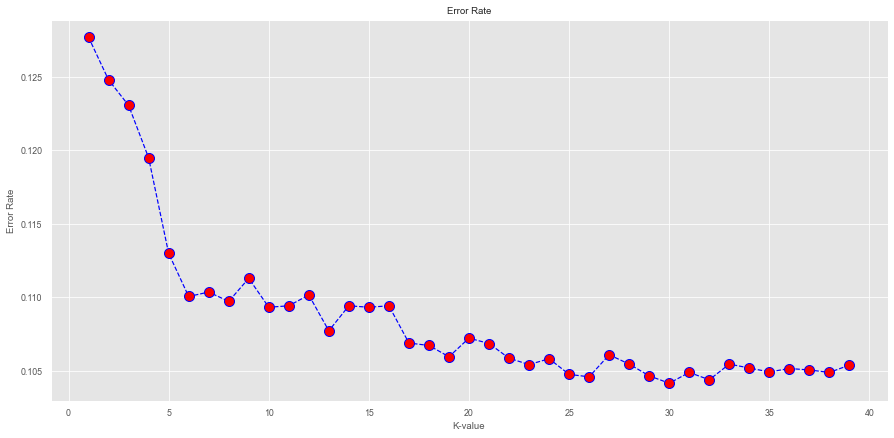

In [101]:
plt.figure(figsize = (15,7))
plt.plot(range(1,40), error_rate, color = "blue", ls = "dashed", marker = "o", markerfacecolor = "red",
         markersize = 10)
plt.title("Error Rate")
plt.xlabel("K-value")
plt.ylabel("Error Rate")

In [102]:
neighbor = KNeighborsClassifier(n_neighbors=30)
neighbor.fit(featureTrain, targetTrain)
knnpredict = neighbor.predict(featureTest)

In [103]:
print(confusion_matrix(targetTest, neighbor_predict))
print(classification_report(targetTest, neighbor_predict))
print(accuracy_score(targetTest, neighbor_predict))

[[  639   107    13     0     0]
 [   95  5316   324     0     0]
 [    0   728 13727   661     0]
 [    0     0  1417  6157   136]
 [    0     0     0   104   576]]
              precision    recall  f1-score   support

           1       0.87      0.84      0.86       759
           2       0.86      0.93      0.89      5735
           3       0.89      0.91      0.90     15116
           4       0.89      0.80      0.84      7710
           5       0.81      0.85      0.83       680

    accuracy                           0.88     30000
   macro avg       0.86      0.86      0.86     30000
weighted avg       0.88      0.88      0.88     30000

0.8805


In [104]:
support = SVC(random_state = 0)

In [105]:
support.fit(featureTrain, targetTrain)

SVC(random_state=0)

In [106]:
support_predict = support.predict(featureTest)

In [107]:
print(classification_report(targetTest, support_predict))
print(confusion_matrix(targetTest, support_predict))
print(accuracy_score(targetTest, support_predict))

              precision    recall  f1-score   support

           1       0.91      0.78      0.84       759
           2       0.90      0.90      0.90      5735
           3       0.90      0.91      0.90     15116
           4       0.86      0.86      0.86      7710
           5       0.94      0.76      0.84       680

    accuracy                           0.89     30000
   macro avg       0.90      0.84      0.87     30000
weighted avg       0.89      0.89      0.89     30000

[[  593   150    16     0     0]
 [   41  5154   540     0     0]
 [   17   453 13719   927     0]
 [    0     0  1015  6665    30]
 [    0     0     0   165   515]]
0.8882


In [108]:
report = [["Support Vector Machines", 0.89, 0.90, 0.84, 0.87], ["Random Forest", 0.89, 0.89, 0.86, 0.87], 
          ["K-nearest neighbor", 0.88, 0.86, 0.86, 0.86], ["Decision Tree", 0.77, 0.79, 0.61, 0.66]]
overall_result = pd.DataFrame(report, columns = ["Model", "Accuracy Score", "Precision", "Recall", "F1-score"])
overall_result.sort_values("Accuracy Score", ascending = False)

,Model,Accuracy Score,Precision,Recall,F1-score
0,Support Vector Machines,0.89,0.90,0.84,0.87
1,Random Forest,0.89,0.89,0.86,0.87
2,K-nearest neighbor,0.88,0.86,0.86,0.86
3,Decision Tree,0.77,0.79,0.61,0.66


In [109]:
report2 = [["Support Vector Machines", 0.91, 0.90, 0.90, 0.86, 0.94],
           ["Random Forest", 0.89, 0.90, 0.91, 0.87, 0.87], 
          ["K-nearest neighbor", 0.87, 0.86, 0.89, 0.89, 0.81],
           ["Decision Tree", 0.84, 0.74, 0.80, 0.74, 0.83]]
overall_result2 = pd.DataFrame(report2, columns = ["Model", "Rating 1 precision", "Rating 2 precision",
                                                  "Rating 3 precision", "Rating 4 precision",
                                                  "Rating 5 precision"])
overall_result2.sort_values("Rating 5 precision", ascending = False)

,Model,Rating 1 precision,Rating 2 precision,Rating 3 precision,Rating 4 precision,Rating 5 precision
0,Support Vector Machines,0.91,0.90,0.90,0.86,0.94
1,Random Forest,0.89,0.90,0.91,0.87,0.87
3,Decision Tree,0.84,0.74,0.80,0.74,0.83
2,K-nearest neighbor,0.87,0.86,0.89,0.89,0.81
